*CASE Study-1 - Don't not Overfit ||*

Data Source : https://www.kaggle.com/c/dont-overfit-ii/data

**The primary goal of this case study to avoid overfitting problem of given small amount of training sample**

We have 250 samples data and 300 features and 1 id and 1 class label(0/1)
We have 19750 features and 300 features and 1 id, 

So, with small amount of training data set, We must to do task carefully to avoid overfitting.


**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the training data with the help of pandas library**

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.head()

id  target      0      1      2  ...    295    296    297    298    299
0   0     1.0 -1.067 -1.114 -0.616  ...  0.125  0.347  0.436  0.958 -0.824
1   1     0.0 -0.831  0.271  1.716  ... -1.506  0.462 -0.029 -1.932 -0.343
2   2     0.0  0.099  1.390 -0.732  ... -0.309 -0.339 -0.148 -0.646  0.725
3   3     1.0 -0.989 -0.916 -1.343  ... -0.163 -0.958 -1.081  0.805  3.401
4   4     0.0  0.811 -1.509  0.522  ... -0.445  1.751  1.442 -0.393 -0.643

[5 rows x 302 columns]

In [ ]:
train_data.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [ ]:
train_data.shape

(250, 302)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [ ]:
train_data.describe()

id      target           0  ...         297         298         299
count  250.000000  250.000000  250.000000  ...  250.000000  250.000000  250.000000
mean   124.500000    0.268000   -0.098064  ...   -0.012540   -0.039904    0.073236
std     72.312977    0.443806    0.996063  ...    0.958744    0.948251    0.924989
min      0.000000    0.000000   -3.181000  ...   -2.665000   -3.006000   -2.471000
25%     62.250000    0.000000   -0.756250  ...   -0.677500   -0.719750   -0.559000
50%    124.500000    0.000000   -0.064500  ...   -0.025500   -0.027500    0.160500
75%    186.750000    1.000000    0.647750  ...    0.671000    0.717000    0.711000
max    249.000000    1.000000    2.347000  ...    2.388000    2.730000    3.401000

[8 rows x 302 columns]

**Observation**

Train data has 300 independent features(0-299) and one dependent feature(target) along with unique id. All the values of feature are continuous and have same distribution from distribution table.

In [ ]:
print(train_data["target"].value_counts())

0.0    183
1.0     67
Name: target, dtype: int64


We found 183 count for target value 0 and 67 for target value 1. This is imbalanced dataset(Not highly imbalanced but decent).

In [ ]:
nul=0
for col in train_data.columns:
  if(train_data[col].isnull().any()):
    print(col,"has null value")
    nul=1
if(nul==0):
  print("There is no null value")

There is no null value


There are no null values found and all are real values

**Exploratory Data Analysis(EDA)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart of Target Distribution')

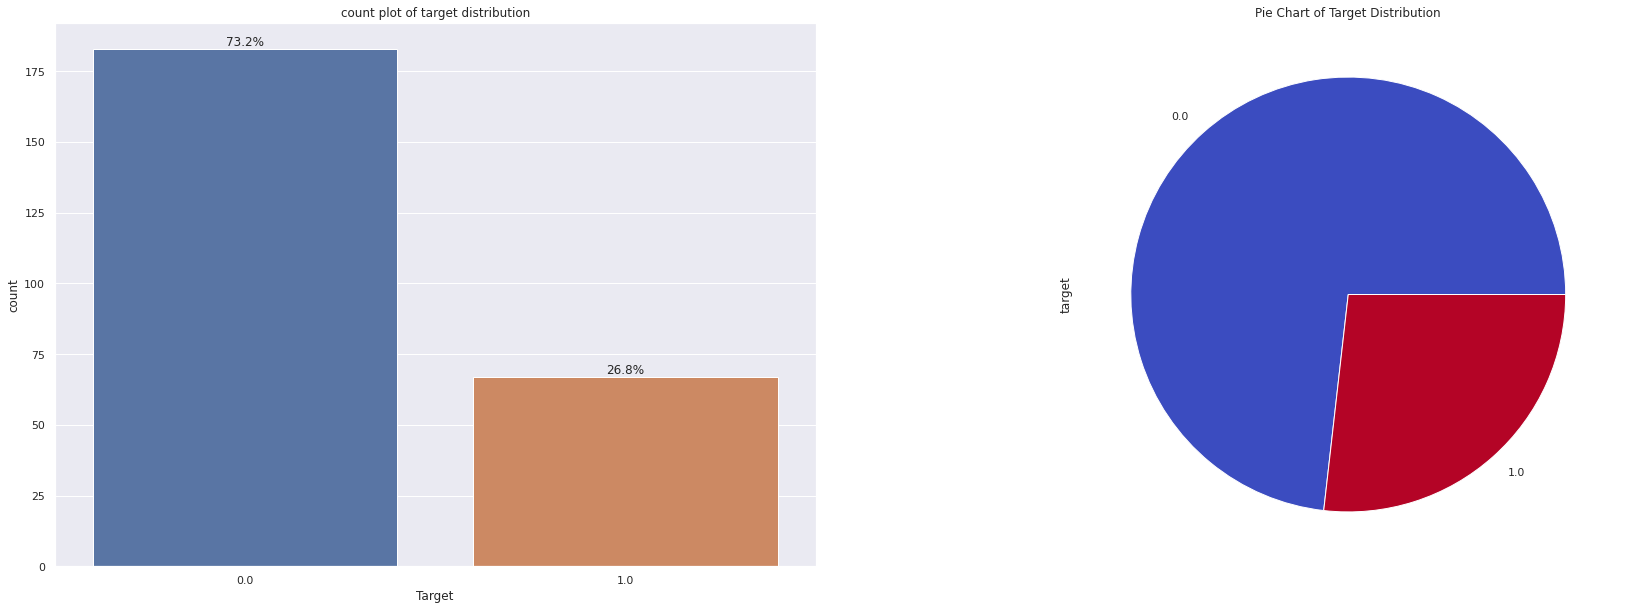

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
plt.subplot(1,2,1)
ax = sns.countplot(train_data['target'])
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/len(train_data)), (p.get_x()+0.35, p.get_height()+1))
ax.set_title('count plot of target distribution')
ax.set_xlabel('Target')
ax.set_ylabel('count')

plt.subplot(1,2,2)
ax = train_data['target'].value_counts().plot(kind='pie',colormap='coolwarm')
ax.set_title("Pie Chart of Target Distribution")

**Observation**

It is clearly said that data is imbalanced, where data points belonging to target 0 is 73.2% and 1 is 26.8%. Thus it is imbalanced data.

New Thing : I have tried to get mean and standandard deviation

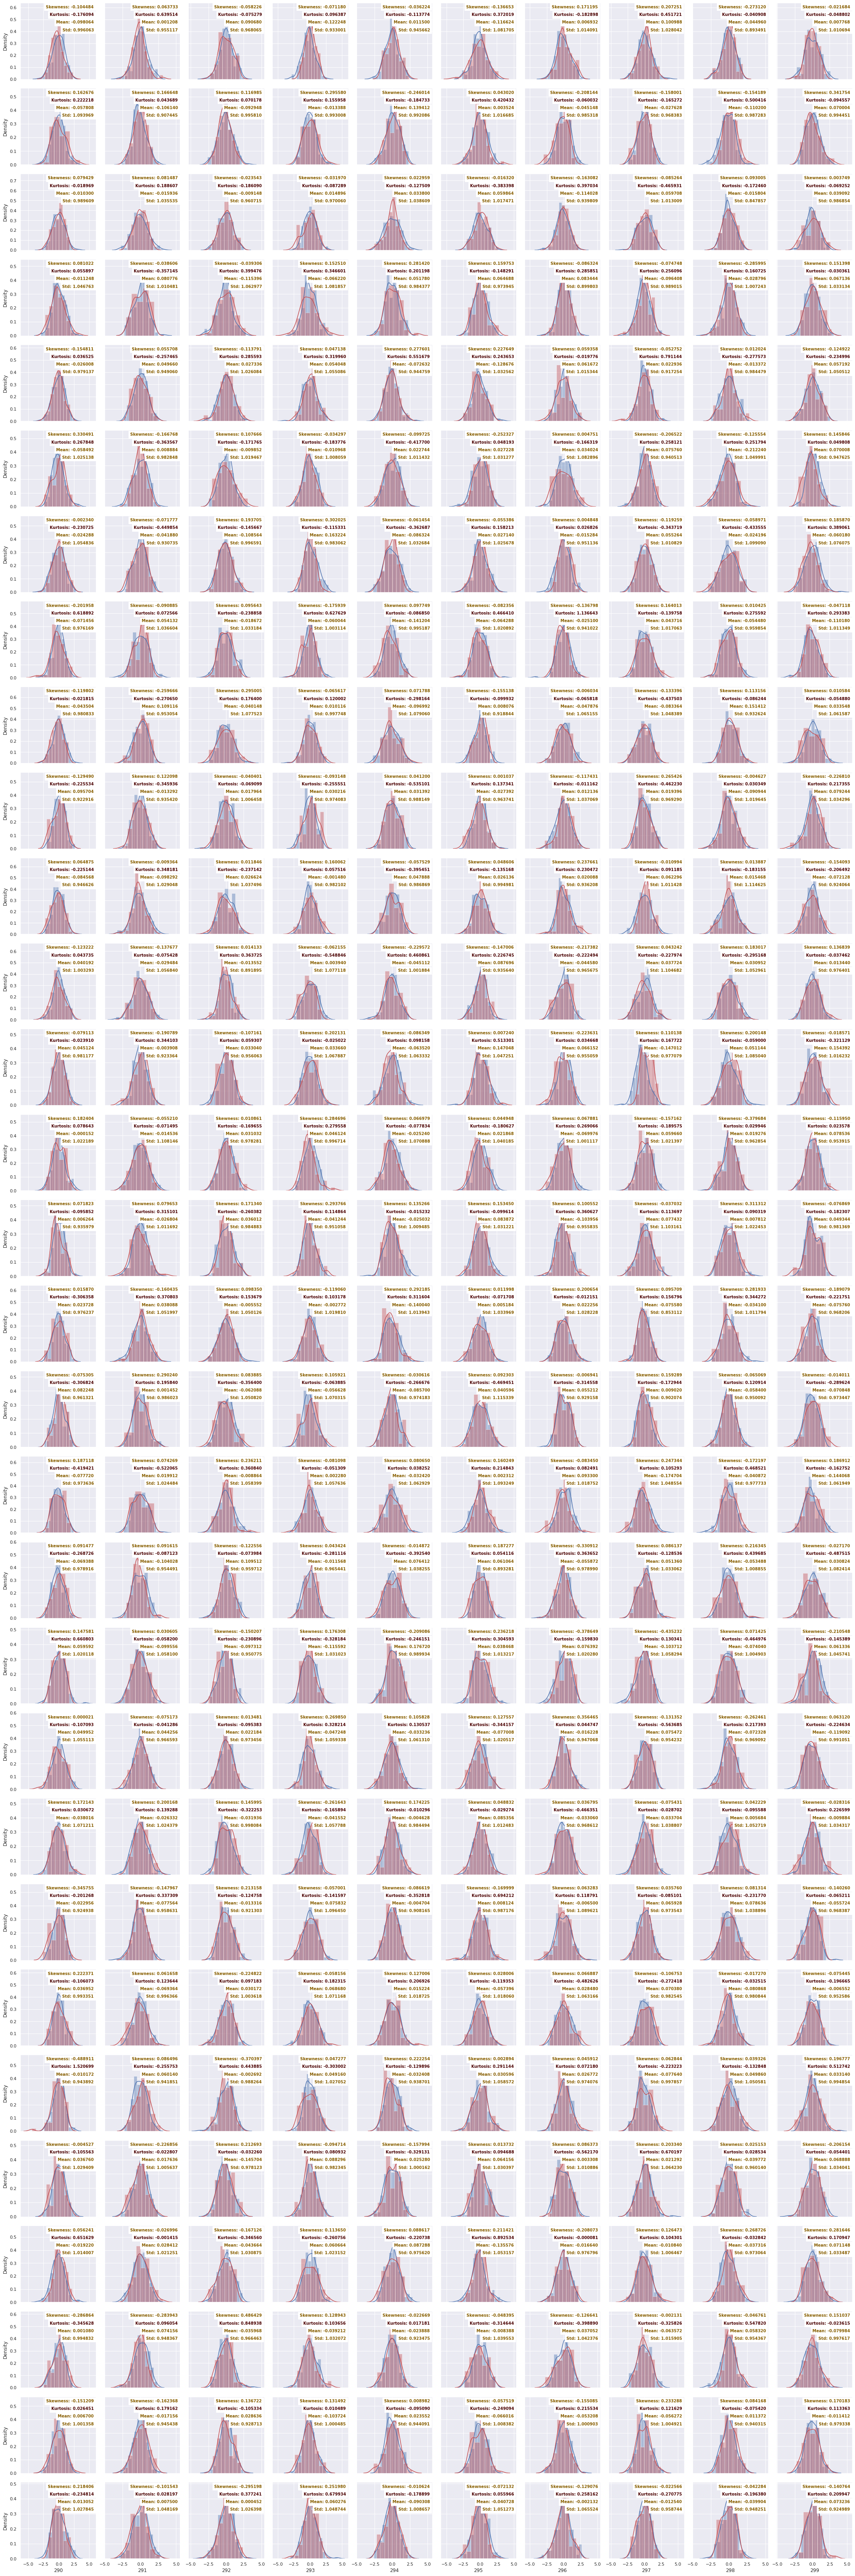

Skewness Range:[-0.4889114906320757,0.4864285153563513] 
Kurtosis Range:[-0.5636848359050028,1.5206991488929726] 


In [ ]:
#https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

# https://stackoverflow.com/questions/50940283/show-metrics-like-kurtosis-skewness-on-distribution-plot-using-seaborn-in-pytho
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(30,90)})
fig, ax = plt.subplots(30, 10,sharex='col', sharey='row')
ax = ax.reshape(-1)
for i, col in enumerate(train_data.columns[2:]):
    g0 = train_data[train_data['target']==0.0][col]
    g1 = train_data[train_data['target']==1.0][col]
    sns.distplot(g0, label = 'target 0', ax=ax[i], color='b')
    sns.distplot(g1, label = 'target 1', ax=ax[i], color='r')

min_skew, max_skew = 100, -100
min_kurt, max_kurt = 100, -100

for i, x in enumerate(ax):
    skew = train_data.iloc[:,i+2].skew()
    min_skew = min(min_skew, skew)
    max_skew = max(max_skew, skew)
    x.text(x=0.97, y=0.97, transform=x.transAxes, s="Skewness: %f" % skew,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    kurt = train_data.iloc[:,i+2].kurt()
    min_kurt = min(min_kurt, kurt)
    max_kurt = max(max_kurt, kurt)
    x.text(x=0.97, y=0.87, transform=x.transAxes, s="Kurtosis: %f" % kurt,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
for i, x in enumerate(ax):
    mean = train_data.iloc[:,i+2].mean()
    
    x.text(x=0.97, y=0.77, transform=x.transAxes, s="Mean: %f" % mean,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
for i, x in enumerate(ax):
    std = train_data.iloc[:,i+2].std()
    
    x.text(x=0.97, y=0.67, transform=x.transAxes, s="Std: %f" % std,\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')    
plt.tight_layout()
plt.show()

print('Skewness Range:[{},{}] '.format(min_skew,max_skew))
print('Kurtosis Range:[{},{}] '.format(min_kurt,max_kurt))


In [ ]:
print('Skewness Range:[{},{}] '.format(min_skew,max_skew))
print('Kurtosis Range:[{},{}] '.format(min_kurt,max_kurt))

Skewness Range:[-0.4889114906320757,0.4864285153563513] 
Kurtosis Range:[-0.5636848359050028,1.5206991488929726] 


Based on above distriution,We have found skewness range between -0.5 to 0.5 and kurtosis range is less than 3. The distribution for all 300 features are showing alomost Symetric distribution. 

The mean for all 300 features are  almost close to 0. And The mean for all 300 features are  almost close to 1. The Distributions are very close to Standard Gaussian Distribution

**Box Plot of all 300 features in single frame**

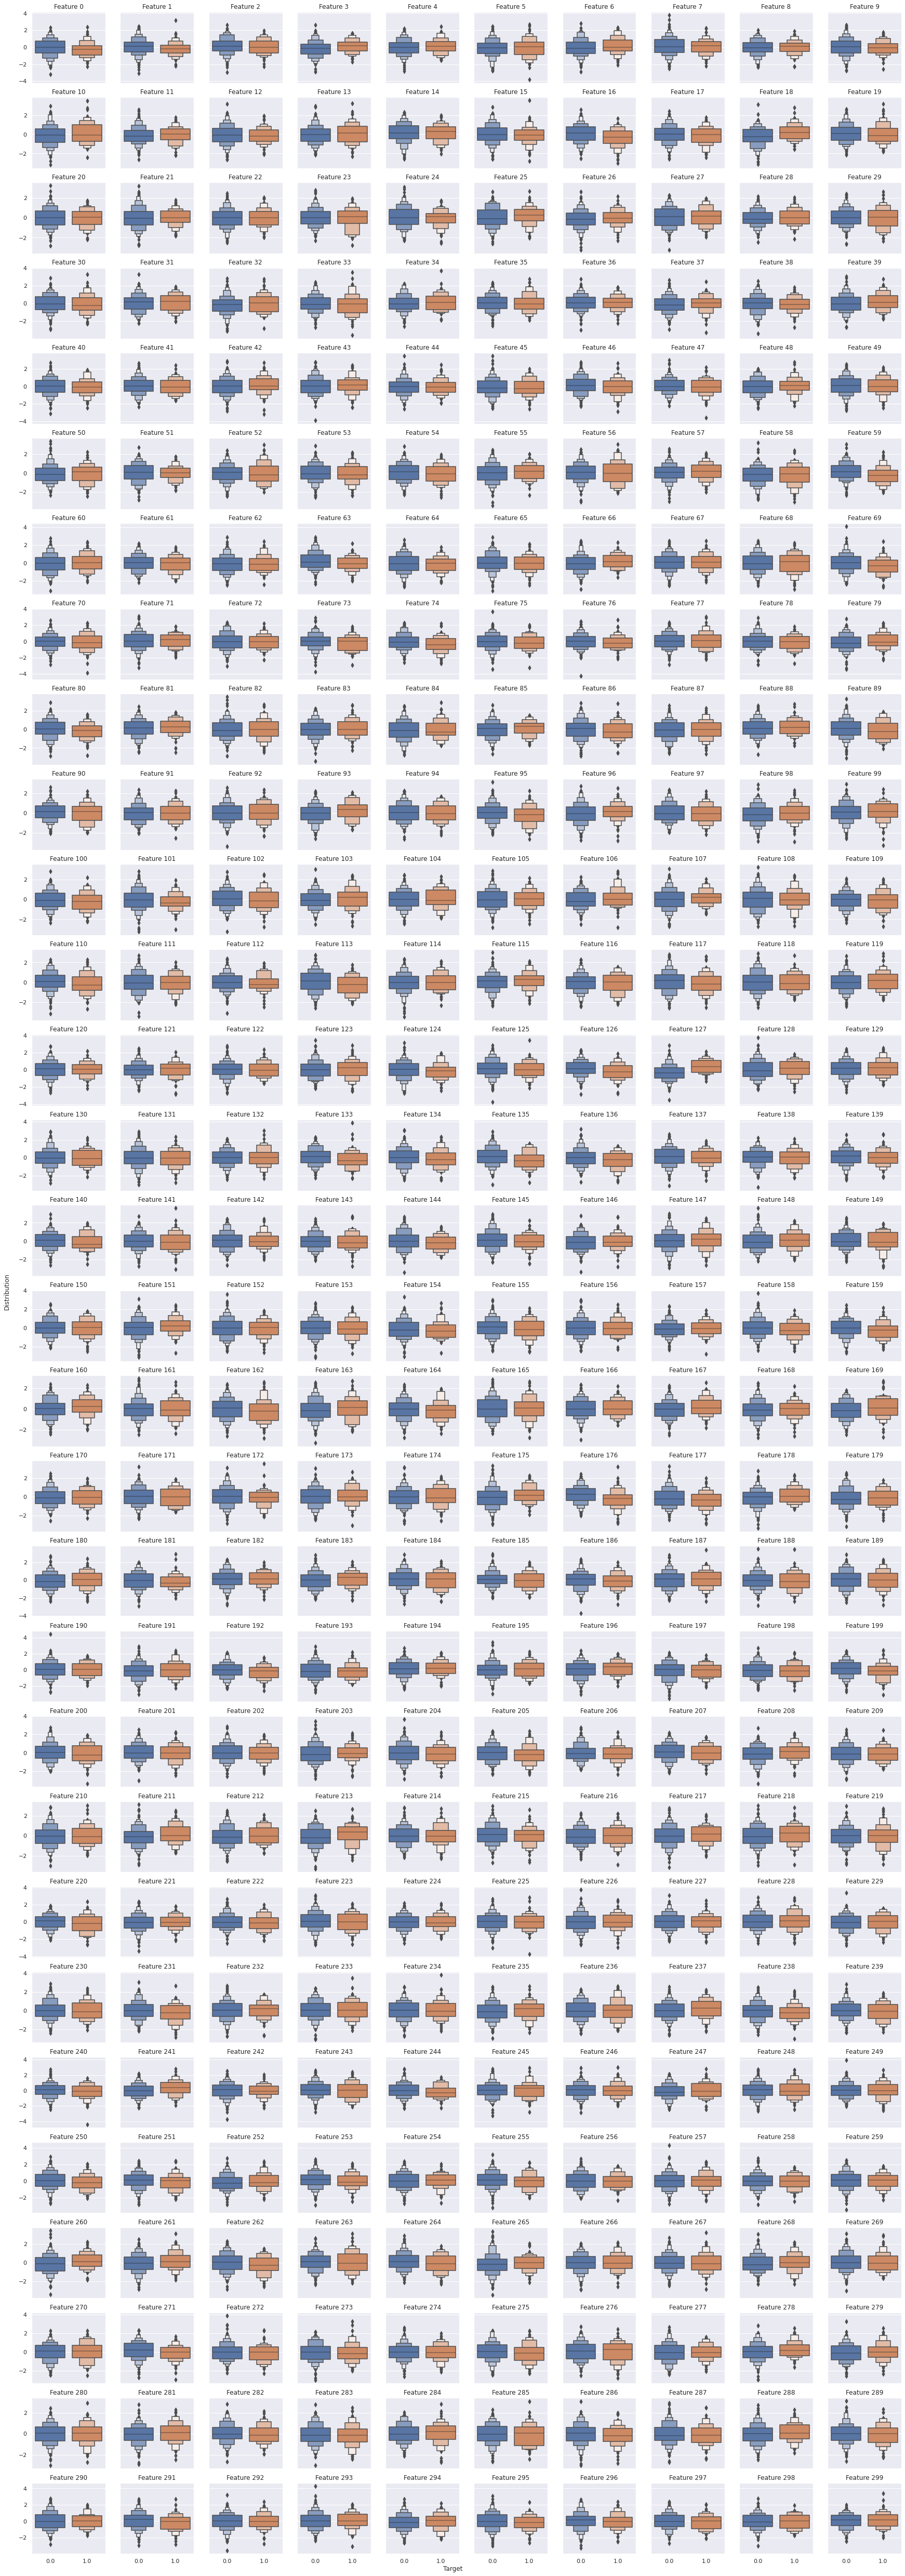

In [ ]:

sns.set(rc={'figure.figsize':(30,90)})
fig, ax = plt.subplots(30, 10,sharex='col', sharey='row')
fig.text(0.5, 0.12, s='Target', ha='center',)
fig.text(0.1, 0.5, s='Distribution', va='center', rotation='vertical')
ax = ax.reshape(-1)
for i, col in enumerate(train_data.columns[2:]):
    axe= sns.boxenplot(np.array(train_data['target']),np.array(train_data[col]), ax=ax[i])
    ax[i].set_title('Feature '+col)
plt.show()

**Observation**

From the above two plot it is clearly mentioned that distribution of all 300 features are almost identical. All the features have almost same means and standard deviations

Seem like , Median of both target 0 and 1 have somewhat same. Boxplot detecting few points as outlier

*********  scatter plot between 87 and 122 *********


<Figure size 504x504 with 0 Axes>

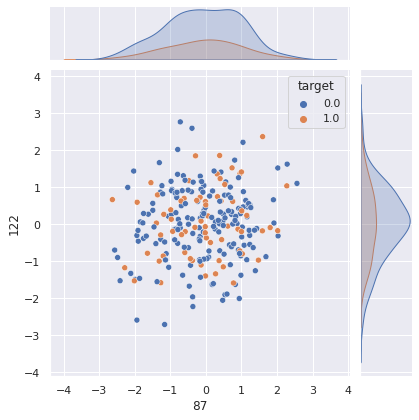

In [ ]:
###Scatter plot
r = np.random.randint(0,299,2,dtype=int)

print('*********  scatter plot between {} and {} *********'.format(r[0],r[1]))

fig = plt.figure(figsize=(7,7))

sns.jointplot(data=train_data,x = str(r[0]),y = str(r[1]),hue=train_data['target'])


We are unable to interpret using scatter plot

Let's observe the density of region rather than points. One of the seaborn toolkit called Contour

*********  Contour plot between 87 and 122 *********


<Figure size 504x504 with 0 Axes>

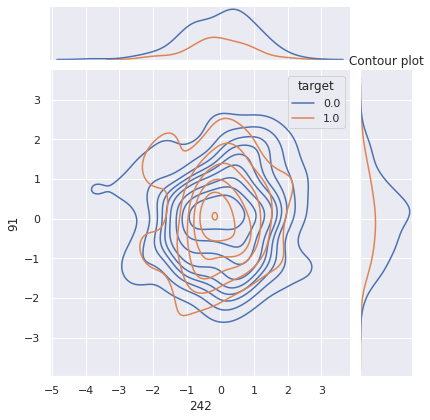

In [ ]:


print('*********  Contour plot between {} and {} *********'.format(r[0],r[1]))

fig = plt.figure(figsize=(7,7))
r = np.random.randint(0,299,2,dtype=int)
sns.jointplot(x = str(r[0]),y = str(r[1]),data = train_data, hue=train_data['target'],kind = "kde")
plt.title("Contour plot")
plt.show()

More density region is in range between -1 to 1.

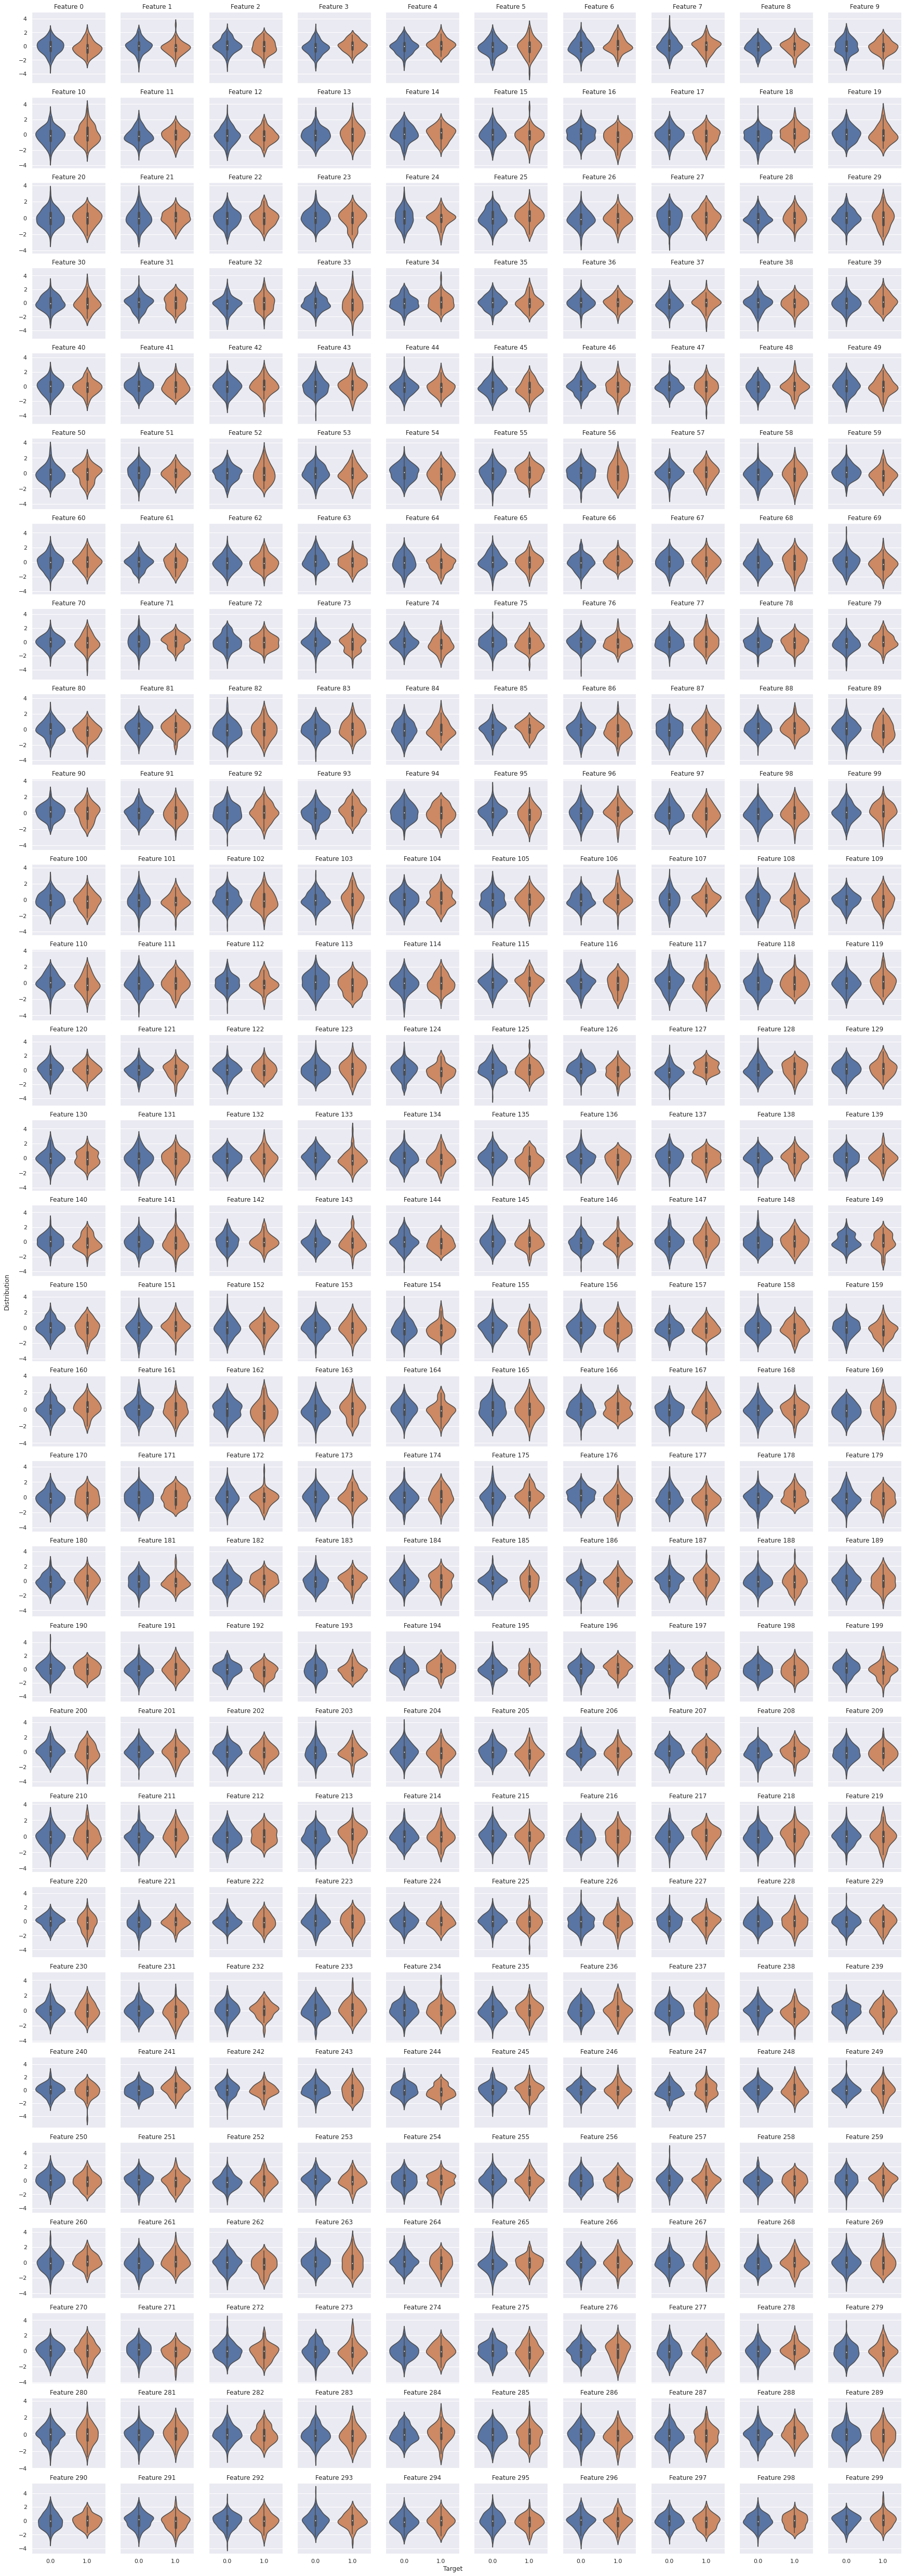

In [ ]:
sns.set(rc={'figure.figsize':(30,90)})
fig, ax = plt.subplots(30, 10,sharex='col', sharey='row')
fig.text(0.5, 0.12, s='Target', ha='center',)
fig.text(0.1, 0.5, s='Distribution', va='center', rotation='vertical')
ax = ax.reshape(-1)
for i, col in enumerate(train_data.columns[2:]):
    axe= sns.violinplot(np.array(train_data['target']),np.array(train_data[col]), ax=ax[i])
    ax[i].set_title('Feature '+col)
plt.show()

It seems like Median for both target value 0 and 1 have somewhat same.

**New thing : I have tried Correlation Among Features till Feature Engineering**

In [ ]:
train_data.drop(['id'],axis=1).corr()

target         0         1  ...       297       298       299
target  1.000000 -0.085268 -0.111172  ... -0.065313 -0.012973  0.050805
0      -0.085268  1.000000  0.039939  ... -0.002739  0.092893  0.065807
1      -0.111172  0.039939  1.000000  ...  0.025713 -0.049503  0.010546
2      -0.036050  0.069846  0.023237  ... -0.025195 -0.086761 -0.169051
3       0.153317 -0.139829 -0.096873  ... -0.008971 -0.052998  0.076426
...          ...       ...       ...  ...       ...       ...       ...
295    -0.071524  0.041362 -0.060408  ... -0.036558 -0.013592 -0.022727
296    -0.020375  0.009961 -0.192962  ... -0.040571  0.101211 -0.060556
297    -0.065313 -0.002739  0.025713  ...  1.000000 -0.000301 -0.112310
298    -0.012973  0.092893 -0.049503  ... -0.000301  1.000000  0.072470
299     0.050805  0.065807  0.010546  ... -0.112310  0.072470  1.000000

[301 rows x 301 columns]

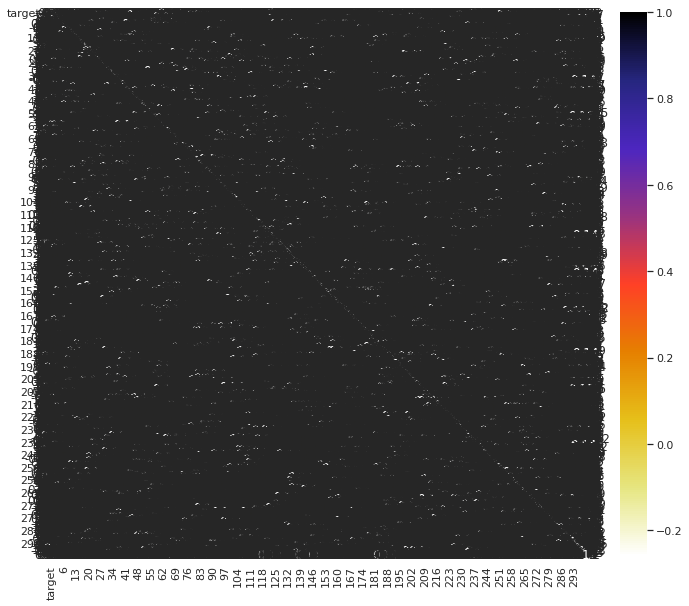

In [ ]:
#using pearson correlation
plt.figure(figsize=(12,10))
cor = train_data.drop(['id'],axis=1).corr()
sns.heatmap(cor,annot=True,cmap = plt.cm.CMRmap_r)
plt.show()

From above heatmap, it is really difficult to get exact correlation value between the features

**Top 20 correlated features**

In [ ]:
correlations = train_data.drop(['id'],axis=1).corr().drop_duplicates()
print("Top 20 positive correlated features with target")
print(correlations['target'].sort_values(ascending = False)[:20])

correlations = train_data.drop(['id'],axis=1).corr().drop_duplicates()
print("Top 20 Negative correlated features with target")
print(correlations['target'].sort_values(ascending = True)[:20])

Top 20 positive correlated features with target
target    1.000000
127       0.337540
18        0.206452
241       0.173879
3         0.153317
66        0.140056
93        0.136455
260       0.134119
213       0.121495
167       0.121217
175       0.120121
261       0.118305
278       0.118187
211       0.116670
151       0.110165
178       0.108901
169       0.106084
208       0.103583
196       0.101347
183       0.098502
Name: target, dtype: float64
Top 20 Negative correlated features with target
176   -0.217100
59    -0.203166
135   -0.179960
16    -0.179796
126   -0.167064
69    -0.164571
74    -0.157756
133   -0.147518
113   -0.146098
199   -0.145666
136   -0.140761
231   -0.137473
271   -0.132168
159   -0.128942
63    -0.128926
177   -0.123470
262   -0.119571
220   -0.117128
95    -0.116410
192   -0.114118
Name: target, dtype: float64


Text(0, 0.5, 'Correlation values')

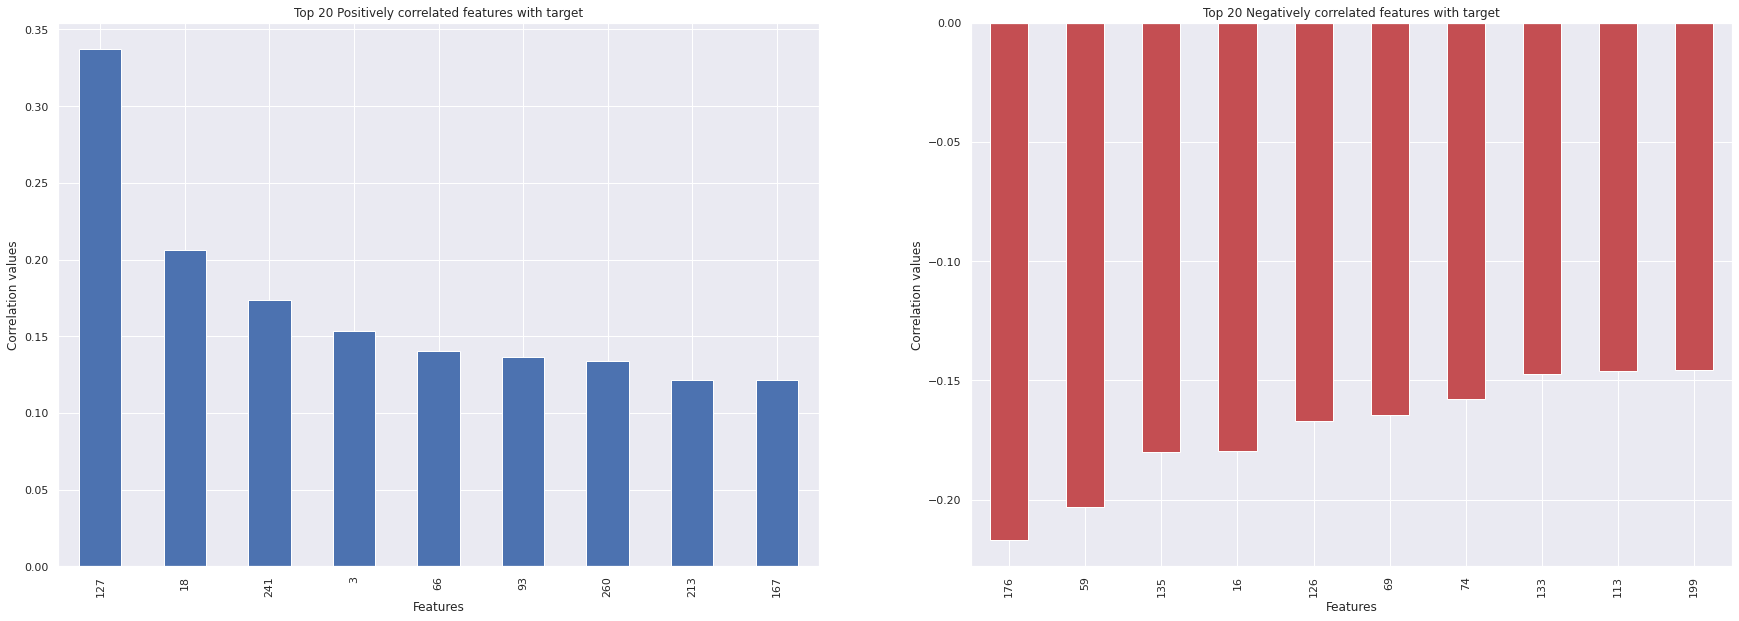

In [ ]:
correlations = train_data.drop(['id'], axis=1).corr().unstack().drop_duplicates()
sns.set(rc={'figure.figsize':(30,10)})
plt.subplot(1,2,1)
x = correlations["target"].sort_values(ascending=False)[1:10].plot(kind='bar', title='Top 20 Positively correlated features with target')
x.set_xlabel('Features')
x.set_ylabel('Correlation values')

plt.subplot(1,2,2)
x = correlations["target"].sort_values(ascending=True)[:10].plot(kind='bar', title='Top 20 Negatively correlated features with target', color='r')
x.set_xlabel('Features')
x.set_ylabel('Correlation values')

The Blue color is showing positive feature and red color negative features. Based on correlation values , we are see that features are not highly correlated with target. Feature 127 and 176 most correlated with target.

**Correlation among 300 features**

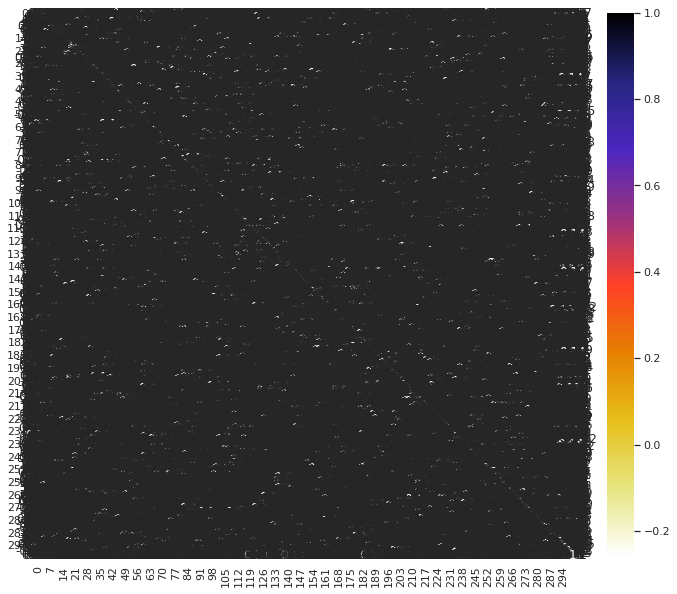

In [ ]:
plt.figure(figsize=(12,10))
cor = train_data.drop(['id','target'],axis=1).corr()
sns.heatmap(cor,annot=True,cmap = plt.cm.CMRmap_r)
plt.show()

From above heatmap, it is really difficult to get exact correlation value between the features

Text(0, 0.5, 'Correlation values')

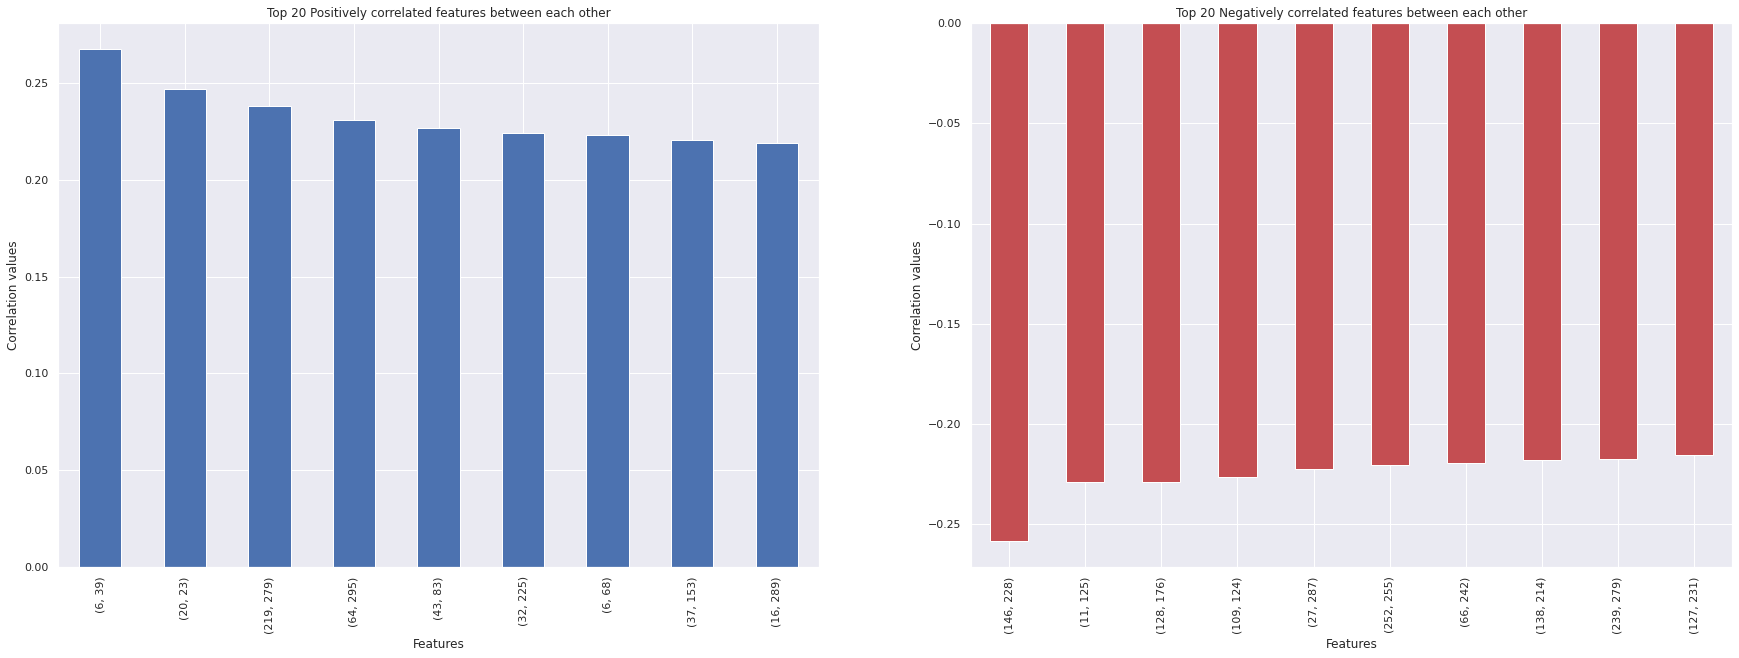

In [ ]:
correlations = train_data.drop(['id','target'], axis=1).corr().unstack().drop_duplicates()
sns.set(rc={'figure.figsize':(30,10)})
plt.subplot(1,2,1)
x = correlations.sort_values(ascending=False)[1:10].plot(kind='bar', title='Top 20 Positively correlated features between each other')
x.set_xlabel('Features')
x.set_ylabel('Correlation values')

plt.subplot(1,2,2)
x = correlations.sort_values(ascending=True)[:10].plot(kind='bar', title='Top 20 Negatively correlated features between each other', color='r')
x.set_xlabel('Features')
x.set_ylabel('Correlation values')

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()#Set of all name of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
         # we are interested in absolute coeff value
         colname = corr_matrix.columns[i] #getting the name of column
         col_corr.add(colname)
  return col_corr
  


In [ ]:
corr_features = correlation(train_data,0.5)
len(set(corr_features))

0

We have set threshold value for correlation value between feature is 0.5 but features are not higly correlated to each other. So we are not deleting any features here.

**Feature Engineering**

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.head()

id  target      0      1      2  ...    295    296    297    298    299
0   0     1.0 -1.067 -1.114 -0.616  ...  0.125  0.347  0.436  0.958 -0.824
1   1     0.0 -0.831  0.271  1.716  ... -1.506  0.462 -0.029 -1.932 -0.343
2   2     0.0  0.099  1.390 -0.732  ... -0.309 -0.339 -0.148 -0.646  0.725
3   3     1.0 -0.989 -0.916 -1.343  ... -0.163 -0.958 -1.081  0.805  3.401
4   4     0.0  0.811 -1.509  0.522  ... -0.445  1.751  1.442 -0.393 -0.643

[5 rows x 302 columns]

In [ ]:
#create duplicate 
data = train_data.drop(['id','target'],axis=1)
data.head()

0      1      2      3      4  ...    295    296    297    298    299
0 -1.067 -1.114 -0.616  0.376  1.090  ...  0.125  0.347  0.436  0.958 -0.824
1 -0.831  0.271  1.716  1.096  1.731  ... -1.506  0.462 -0.029 -1.932 -0.343
2  0.099  1.390 -0.732 -1.065  0.005  ... -0.309 -0.339 -0.148 -0.646  0.725
3 -0.989 -0.916 -1.343  0.145  0.543  ... -0.163 -0.958 -1.081  0.805  3.401
4  0.811 -1.509  0.522 -0.360 -0.220  ... -0.445  1.751  1.442 -0.393 -0.643

[5 rows x 300 columns]

Mean and Standard deviation value of each row

In [ ]:
train_data['mean'] = np.mean(data,axis=1)
train_data['std'] = np.std(data,axis=1)
train_data.head()

id  target      0      1      2  ...    297    298    299      mean       std
0   0     1.0 -1.067 -1.114 -0.616  ...  0.436  0.958 -0.824  0.043330  1.028253
1   1     0.0 -0.831  0.271  1.716  ... -0.029 -1.932 -0.343  0.042283  1.028441
2   2     0.0  0.099  1.390 -0.732  ... -0.148 -0.646  0.725  0.034790  0.983958
3   3     1.0 -0.989 -0.916 -1.343  ... -1.081  0.805  3.401 -0.075967  1.028588
4   4     0.0  0.811 -1.509  0.522  ...  1.442 -0.393 -0.643 -0.075850  0.985099

[5 rows x 304 columns]

In [ ]:
#ref : : https://docs.scipy.org/doc/numpy/reference/routines.math.html)
sin_data = np.sin(data)
cos_data = np.cos(data)
tan_data = np.tan(data)

print("sin data:",sin_data)
print("cos_data:",cos_data)
print("tan_data:", tan_data)

sin data:             0         1         2  ...       297       298       299
0   -0.875756 -0.897470 -0.577775  ...  0.422317  0.818043 -0.733869
1   -0.738606  0.267695  0.989476  ... -0.028996 -0.935472 -0.336314
2    0.098838  0.983701 -0.668359  ... -0.147460 -0.601997  0.663135
3   -0.835477 -0.793172 -0.974166  ... -0.882429  0.720831 -0.256508
4    0.724976 -0.998091  0.498615  ...  0.991717 -0.382961 -0.599599
..        ...       ...       ...  ...       ...       ...       ...
245 -0.067948 -0.182964 -0.913985  ...  0.928740  0.858327 -0.391260
246 -0.231870 -0.980502 -0.887362  ... -0.852631  0.679441  0.127651
247 -0.727446 -0.965561 -0.690370  ...  0.625678 -0.939099 -0.754571
248 -0.435866 -0.202588 -0.690370  ... -0.854503 -0.519273 -0.092866
249  0.663135  0.874304  0.971859  ... -0.992904 -0.196709  0.599599

[250 rows x 300 columns]
cos_data:             0         1         2  ...       297       298       299
0    0.482754  0.441075  0.816196  ...  0.906448  0.57515

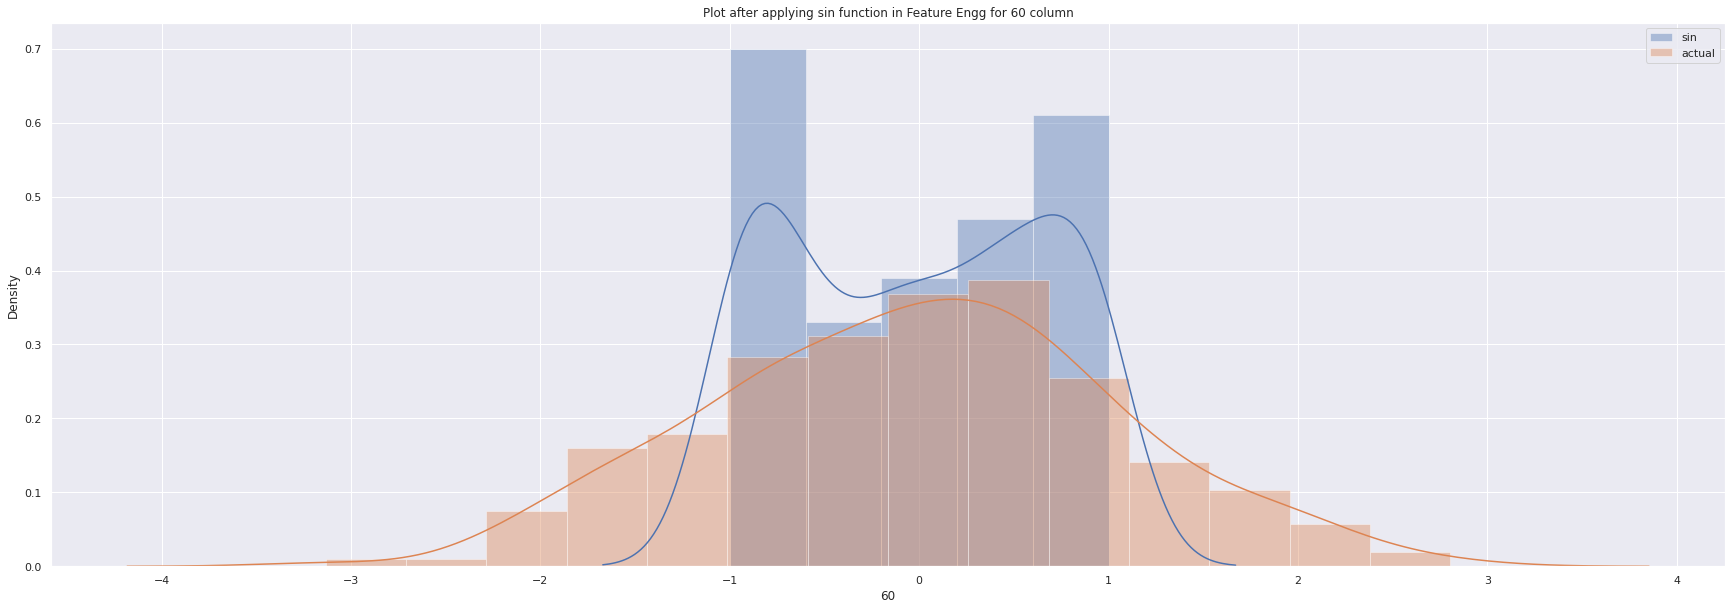

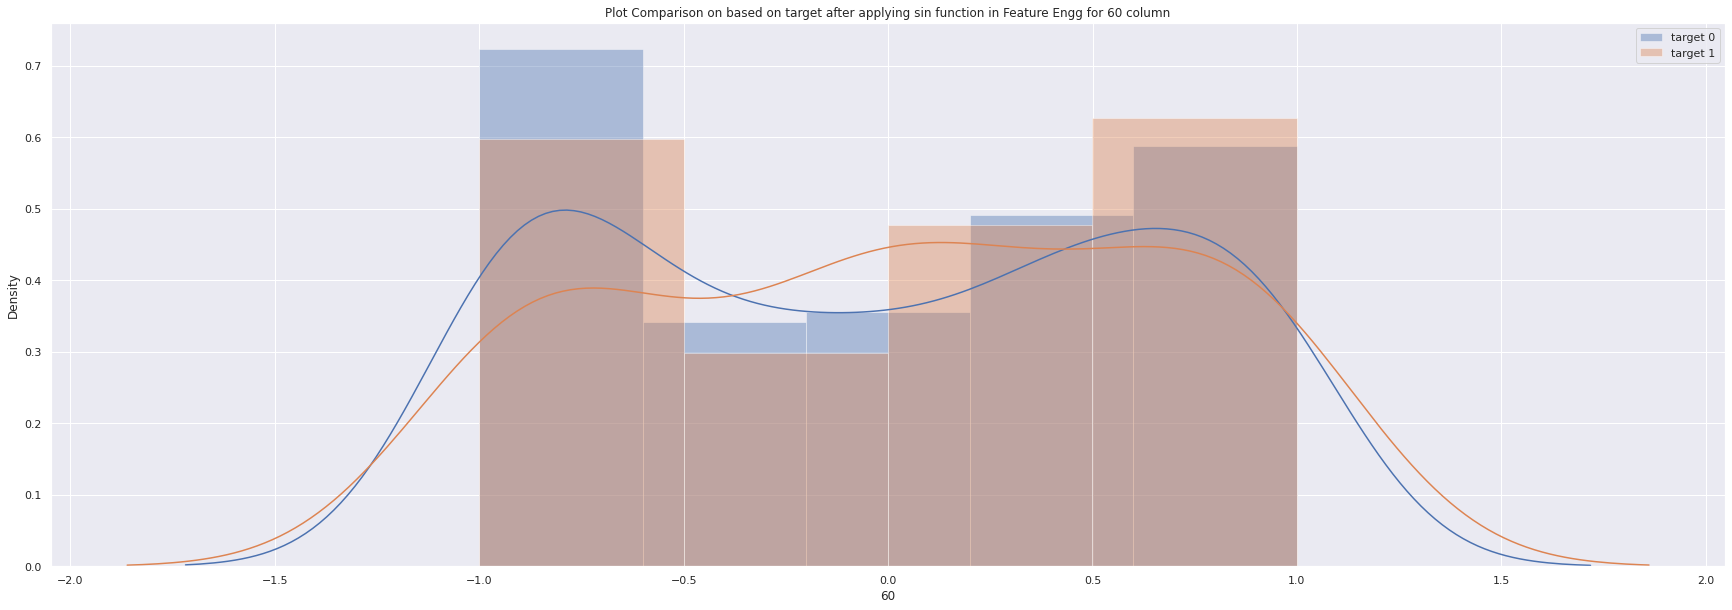

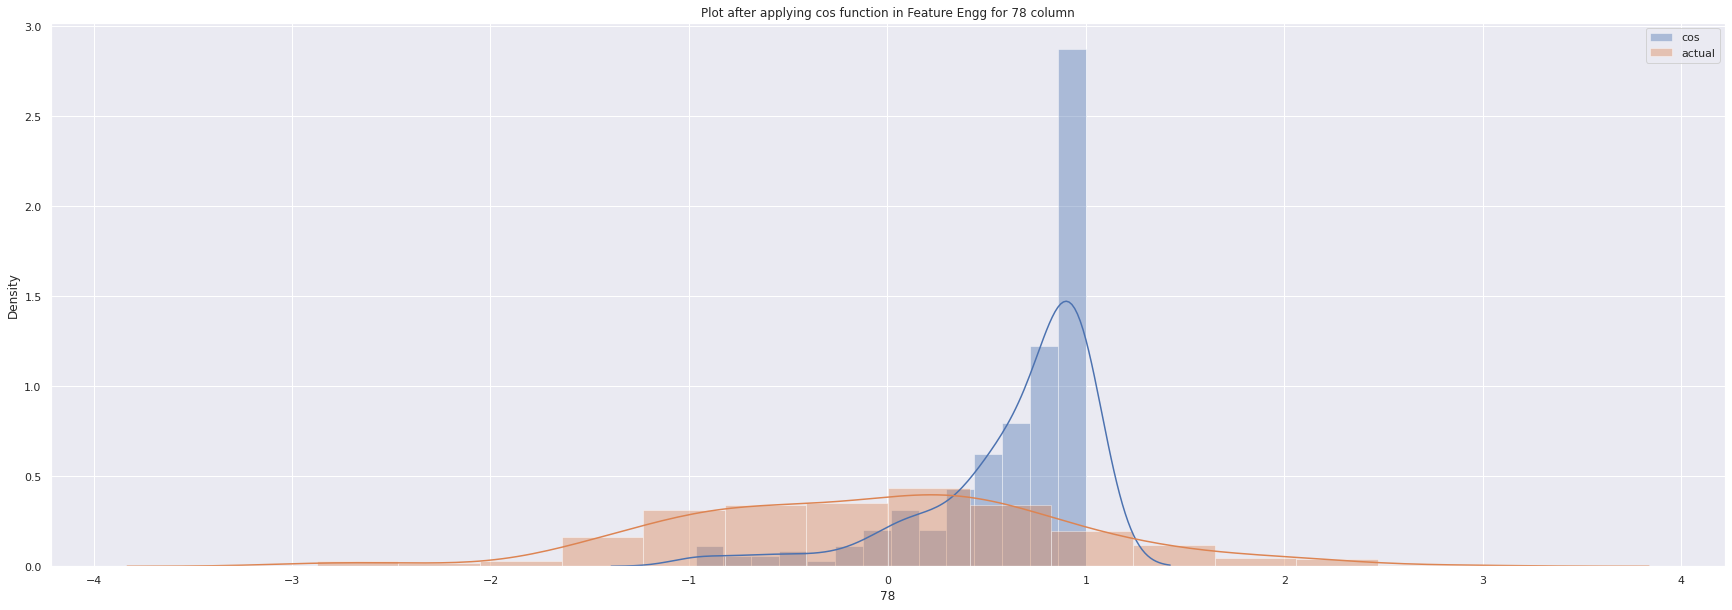

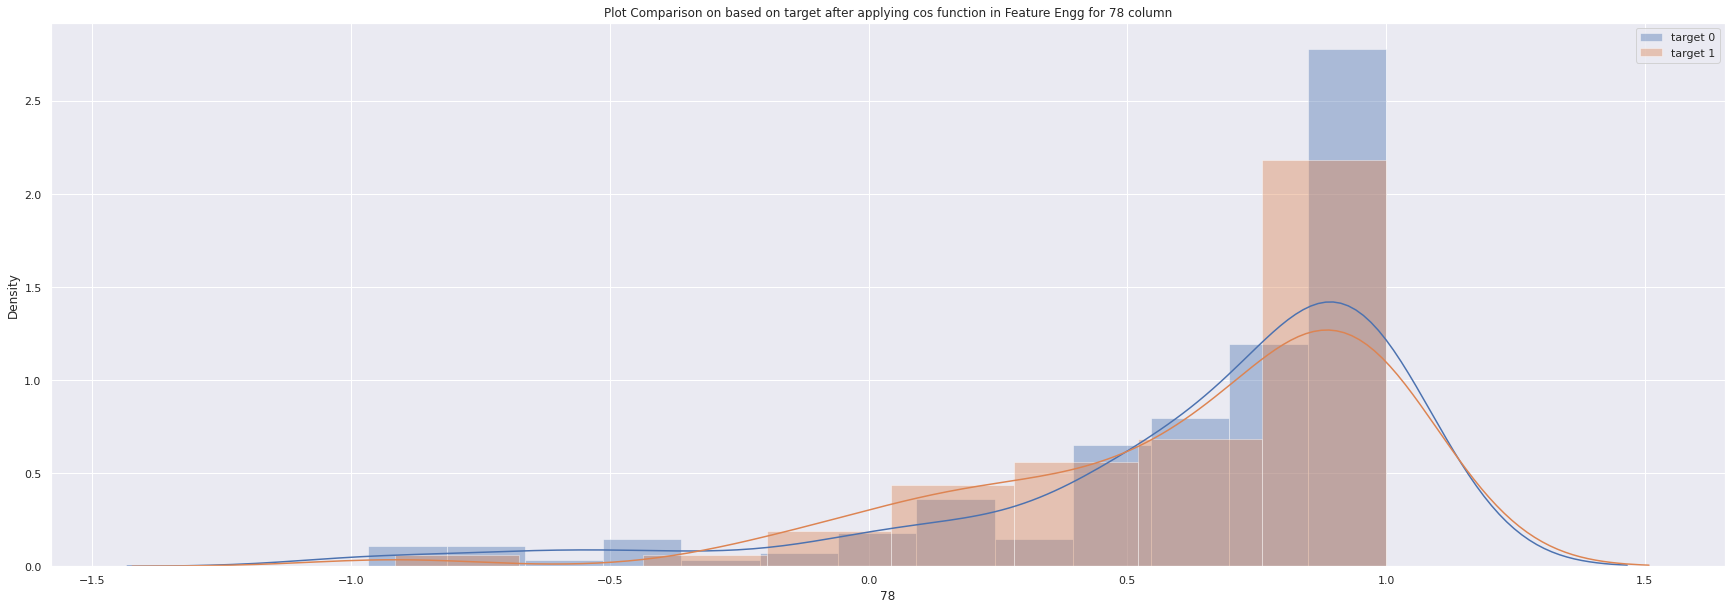

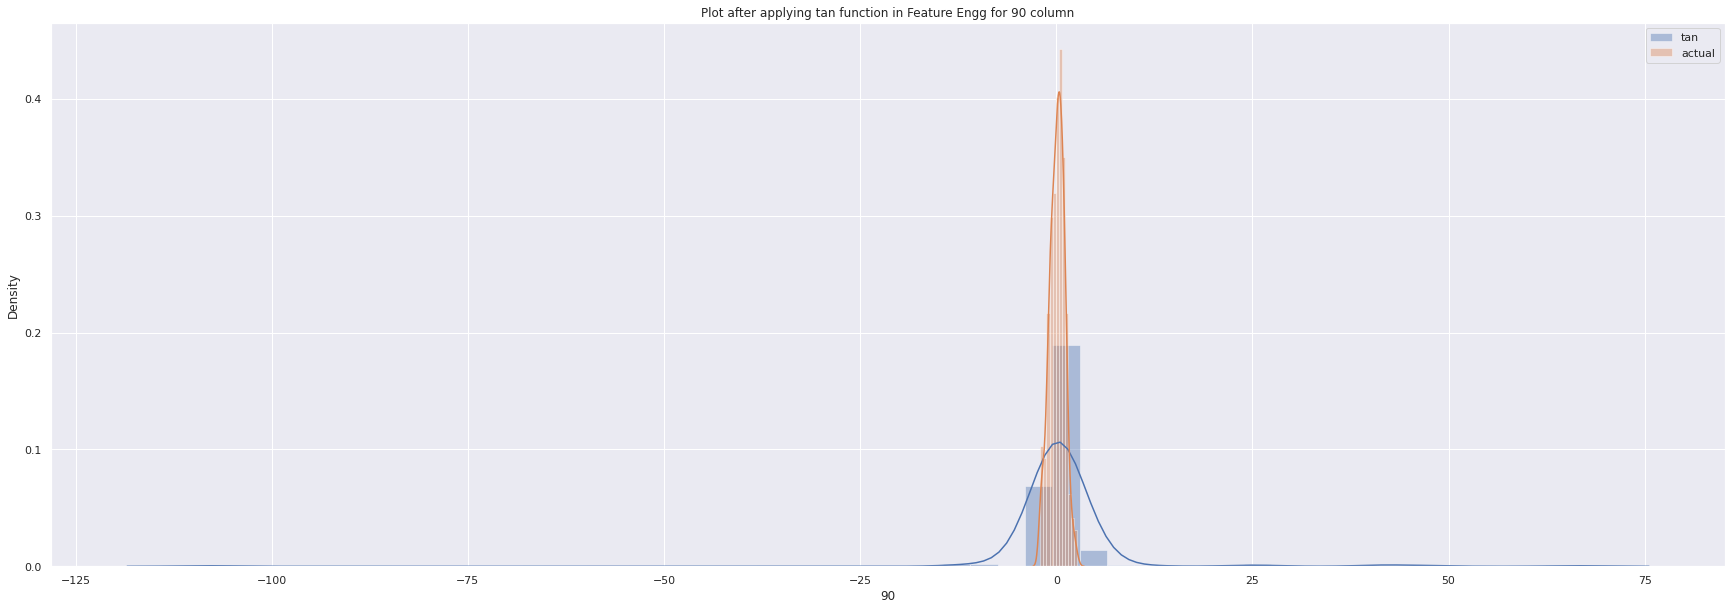

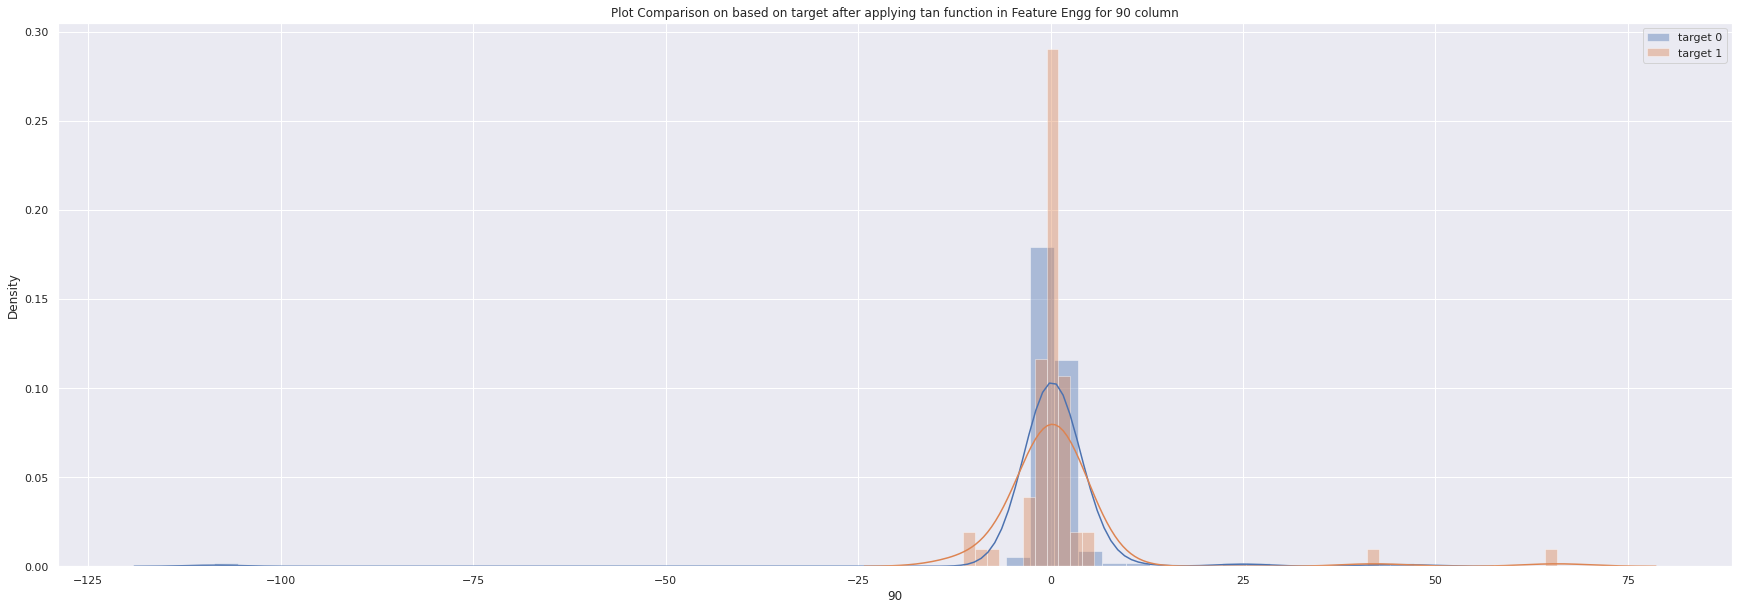

In [ ]:
def feature_function(fe_name, fe_var):
  '''
  Parameter:
  fe_name: name of transformation Feature engg (string)
  fe_var: data after applying feature engineering
  Return:
  Plot 2 graphs.
  First plot for transformation of actual plot and after applying feature␣
  ,→engg plot for any 'r' column
  Second plot for showing the plot of applying feature engg on the based on␣
  ,→target value for any 'r' column
  '''
  r = str(np.random.randint(0,300))
  plt.figure(1)
  sns.distplot(fe_var[r], label=fe_name)
  sns.distplot(train_data[r], label='actual')
  plt.title('Plot after applying {} function in Feature Engg for {} column'.format(fe_name,r))
  plt.legend()
  plt.figure(2)
  sns.distplot(fe_var[train_data['target']==0][r], label='target 0')
  sns.distplot(fe_var[train_data['target']==1][r], label='target 1')
  plt.title('Plot Comparison on based on target after applying {} function in Feature Engg for {} column'.format(fe_name,r))

  plt.legend()

  plt.show()

feature_function('sin',sin_data)
feature_function('cos',cos_data)
feature_function('tan',tan_data)


In [ ]:
train_data['mean_sin'] = np.mean(sin_data,axis=1)
train_data['cos_sin'] = np.mean(cos_data,axis=1)
train_data['mean_tan'] = np.mean(tan_data,axis=1)

In [ ]:
train_data.head()

id  target      0      1  ...       std  mean_sin   cos_sin  mean_tan
0   0     1.0 -1.067 -1.114  ...  1.028253  0.035646  0.596430  0.259822
1   1     0.0 -0.831  0.271  ...  1.028441  0.014111  0.586146 -0.308462
2   2     0.0  0.099  1.390  ...  0.983958 -0.005369  0.613497  1.111762
3   3     1.0 -0.989 -0.916  ...  1.028588 -0.050120  0.580604 -1.380199
4   4     0.0  0.811 -1.509  ...  0.985099 -0.066448  0.609147  3.577602

[5 rows x 307 columns]

We apply hyperbolic function

In [ ]:
sinh_data = np.sinh(data)
cosh_data = np.cosh(data)
tanh_data = np.tanh(data)
print(sinh_data)
print(cosh_data)
print(tanh_data)

            0         1         2  ...       297       298        299
0   -1.281304 -1.359138 -0.655703  ...  0.449946  1.111409  -0.920463
1   -0.930000  0.274329  2.691226  ... -0.029004 -3.379222  -0.349765
2    0.099162  1.882887 -0.799144  ... -0.148541 -0.691878   0.790203
3   -1.158298 -1.049578 -1.784728  ... -1.304185  0.894804  14.980370
4    0.902872 -2.150538  0.546031  ...  1.996346 -0.403195  -0.688233
..        ...       ...       ...  ...       ...       ...        ...
245 -0.068052 -0.185040 -1.425997  ...  1.493226  1.225190  -0.412915
246 -0.236141 -1.846914 -3.819583  ... -1.207867  0.818436   0.128350
247 -5.074783 -3.049549 -0.837913  ...  0.728675 -1.545979  -0.963046
248 -0.466445 -0.205418 -0.837913  ... -4.092895 -0.573536  -0.093134
249  0.790203  1.276433  1.764359  ... -2.617481 -0.199296   0.688233

[250 rows x 300 columns]
            0         1         2  ...       297       298        299
0    1.625343  1.687382  1.195804  ...  1.096563  1.495069   1.3

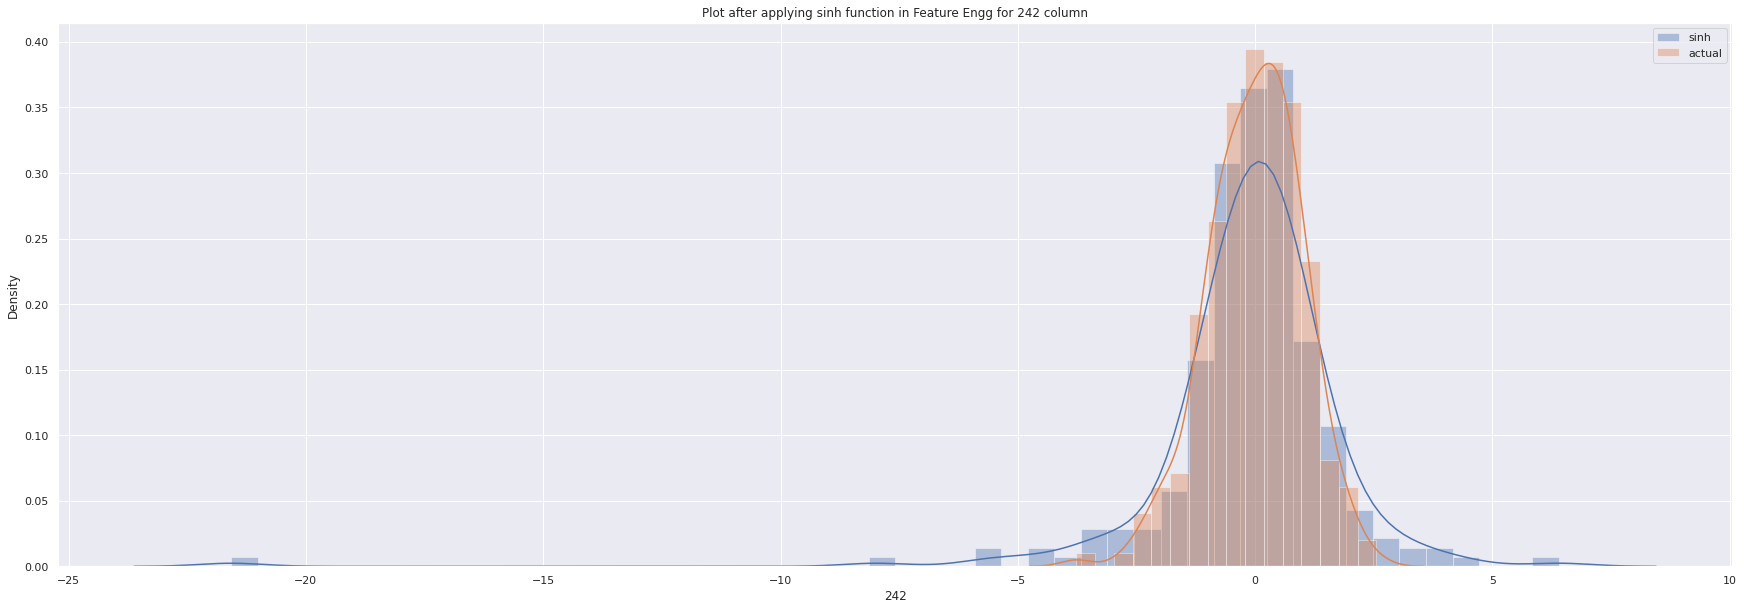

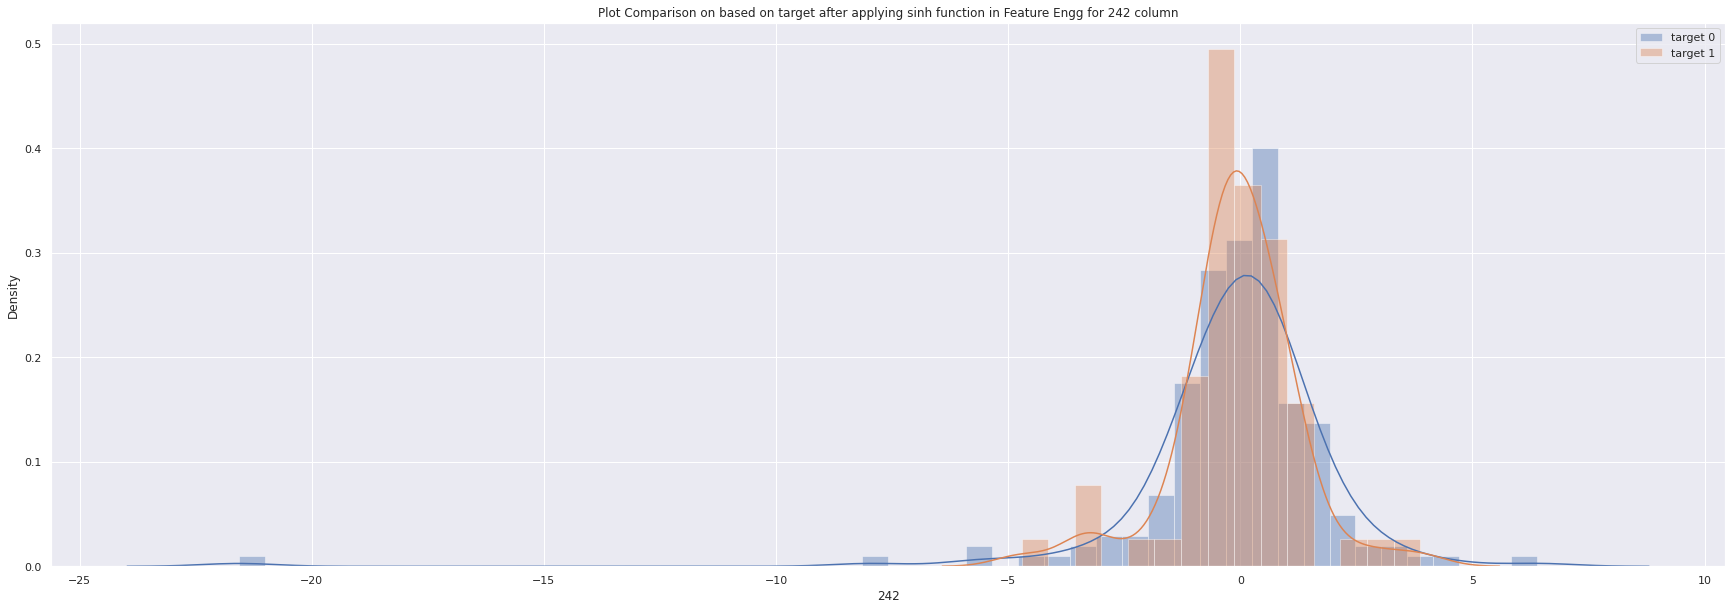

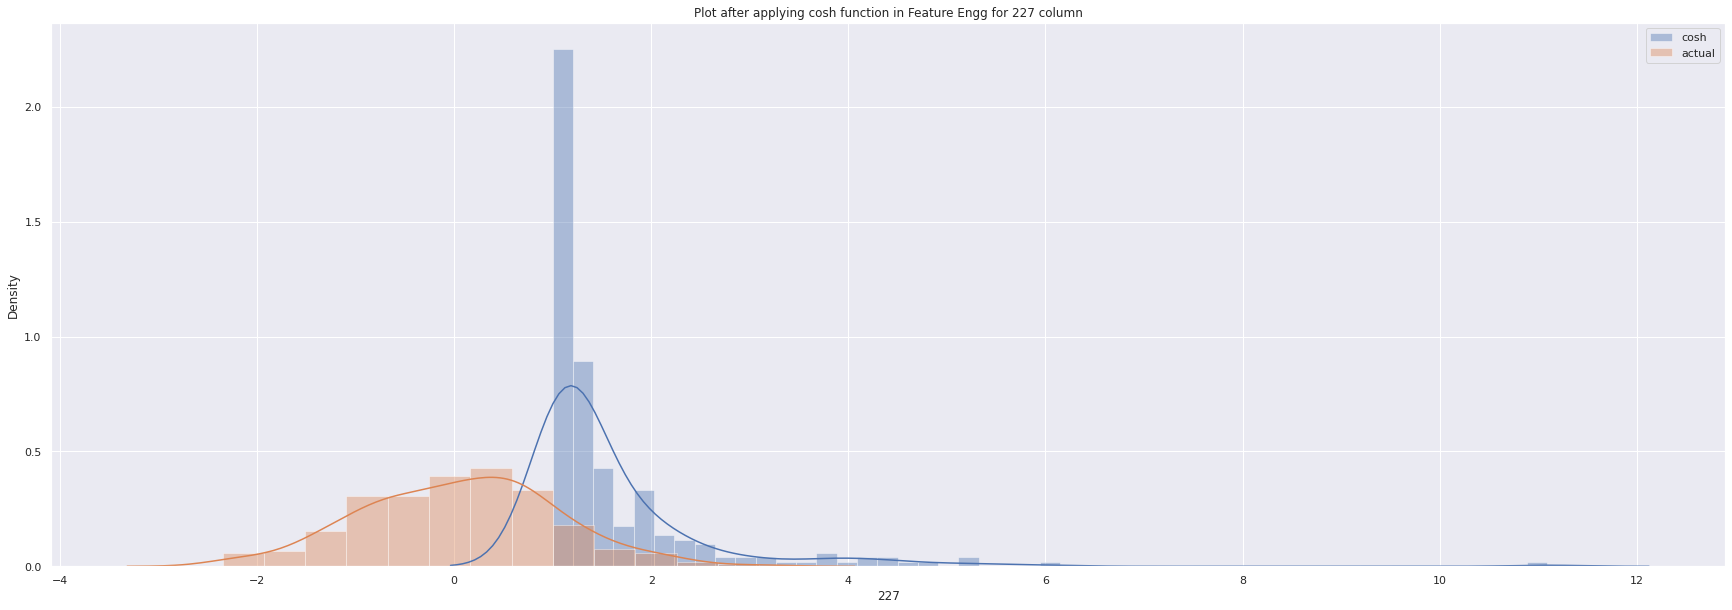

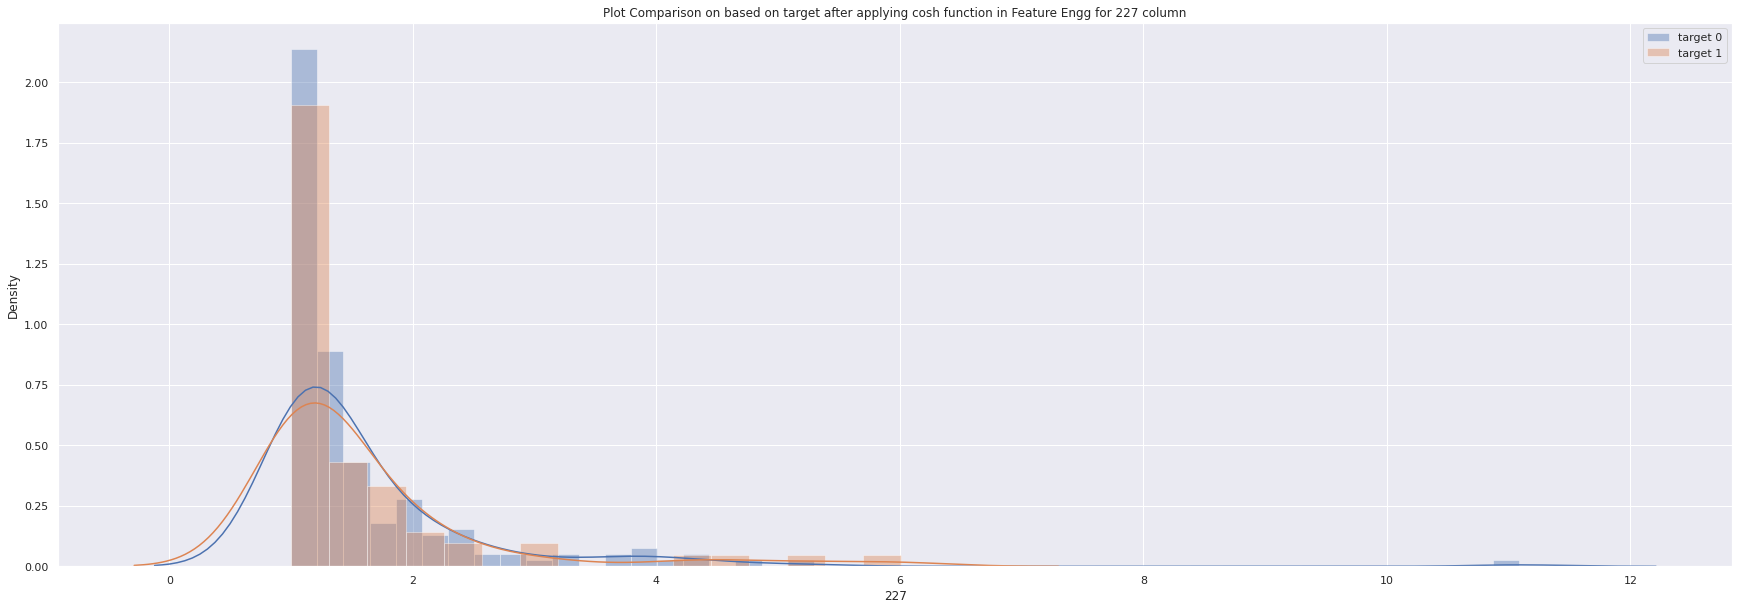

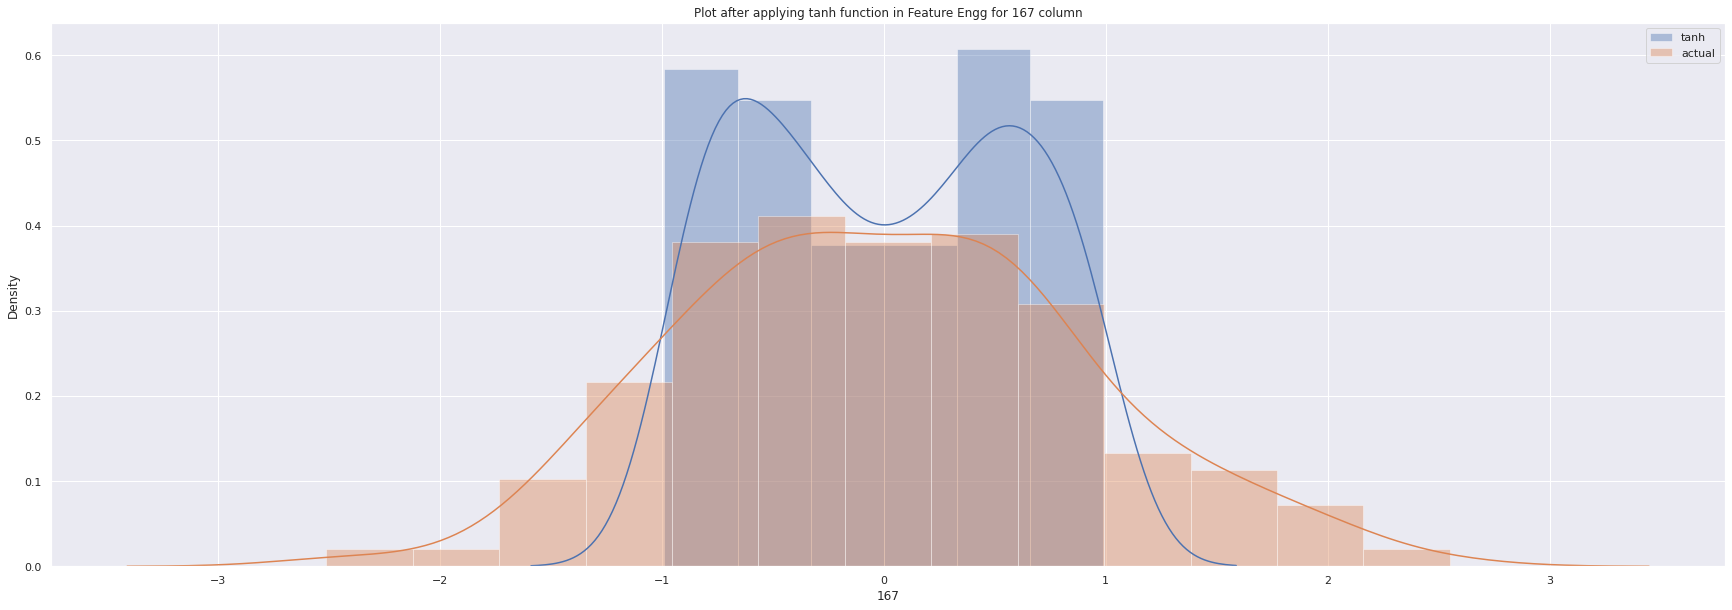

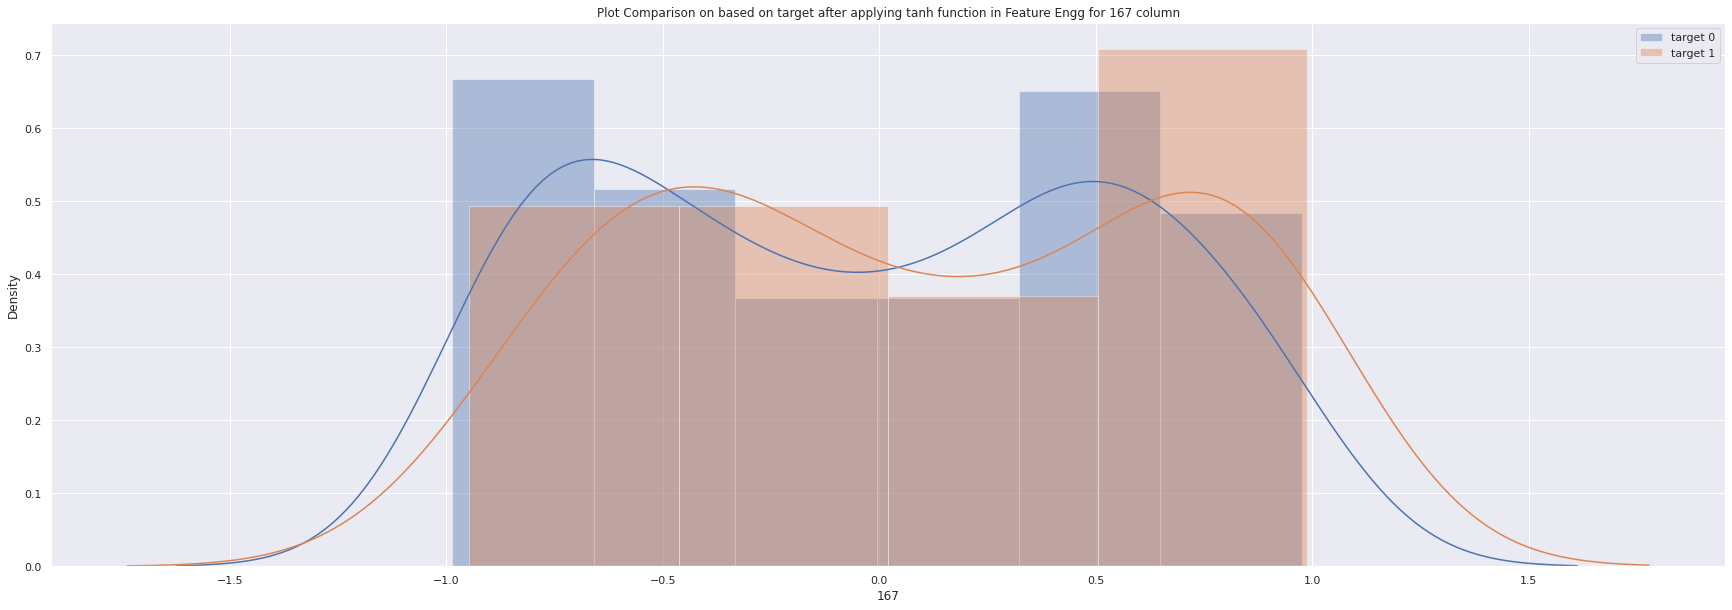

In [ ]:
feature_function('sinh',sinh_data)
feature_function('cosh',cosh_data)
feature_function('tanh',tanh_data)

In [ ]:
train_data['mean_sinh'] = np.mean(sinh_data,axis=1)
train_data['mean_cosh'] = np.mean(cosh_data,axis=1)
train_data['mean_tanh'] = np.mean(tanh_data,axis=1)

In [ ]:
train_data.head()

id  target      0      1  ...  mean_tan  mean_sinh  mean_cosh  mean_tanh
0   0     1.0 -1.067 -1.114  ...  0.259822   0.079803   1.723250   0.033133
1   1     0.0 -0.831  0.271  ... -0.308462   0.098872   1.690783   0.020731
2   2     0.0  0.099  1.390  ...  1.111762   0.120651   1.618182   0.005938
3   3     1.0 -0.989 -0.916  ... -1.380199  -0.099002   1.688951  -0.047605
4   4     0.0  0.811 -1.509  ...  3.577602  -0.094275   1.617215  -0.062958

[5 rows x 310 columns]

In [ ]:
# We have taken ref https://numpy.org/doc/stable/reference/routines.math.html

exp_data = np.exp(data)
expm1_data = np.expm1(data)
exp2_data = np. exp2(data)

In [ ]:
print(exp_data)
print(expm1_data)
print(exp2_data)

            0         1         2  ...       297       298        299
0    0.344039  0.328243  0.540101  ...  1.546509  2.606478   0.438673
1    0.435613  1.311275  5.562235  ...  0.971416  0.144858   0.709638
2    1.104066  4.014850  0.480946  ...  0.862431  0.524138   2.064731
3    0.371948  0.400116  0.261061  ...  0.339256  2.236696  29.994079
4    2.250157  0.221131  1.685395  ...  4.229146  0.675029   0.525713
..        ...       ...       ...  ...       ...       ...        ...
245  0.934260  0.831936  0.315688  ...  3.290370  2.806674   0.668981
246  0.791362  0.253346  0.128735  ...  0.360235  2.110659   1.136553
247  0.097588  0.159773  0.466732  ...  1.965998  0.295230   0.425283
248  0.636991  0.815462  0.466732  ...  0.120392  0.579262   0.911194
249  2.064731  2.897940  3.792404  ...  0.184520  0.820370   1.902179

[250 rows x 300 columns]
            0         1         2  ...       297       298        299
0   -0.655961 -0.671757 -0.459899  ...  0.546509  1.606478  -0.5

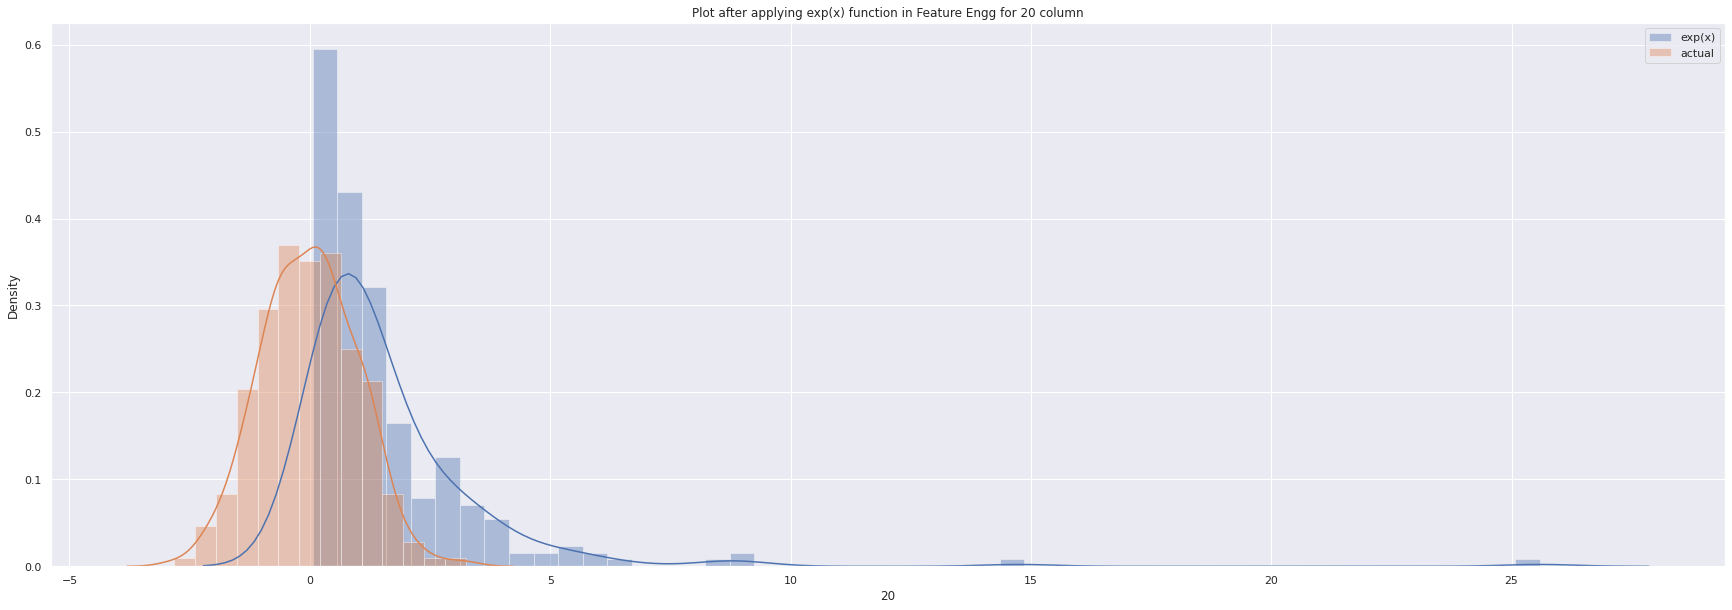

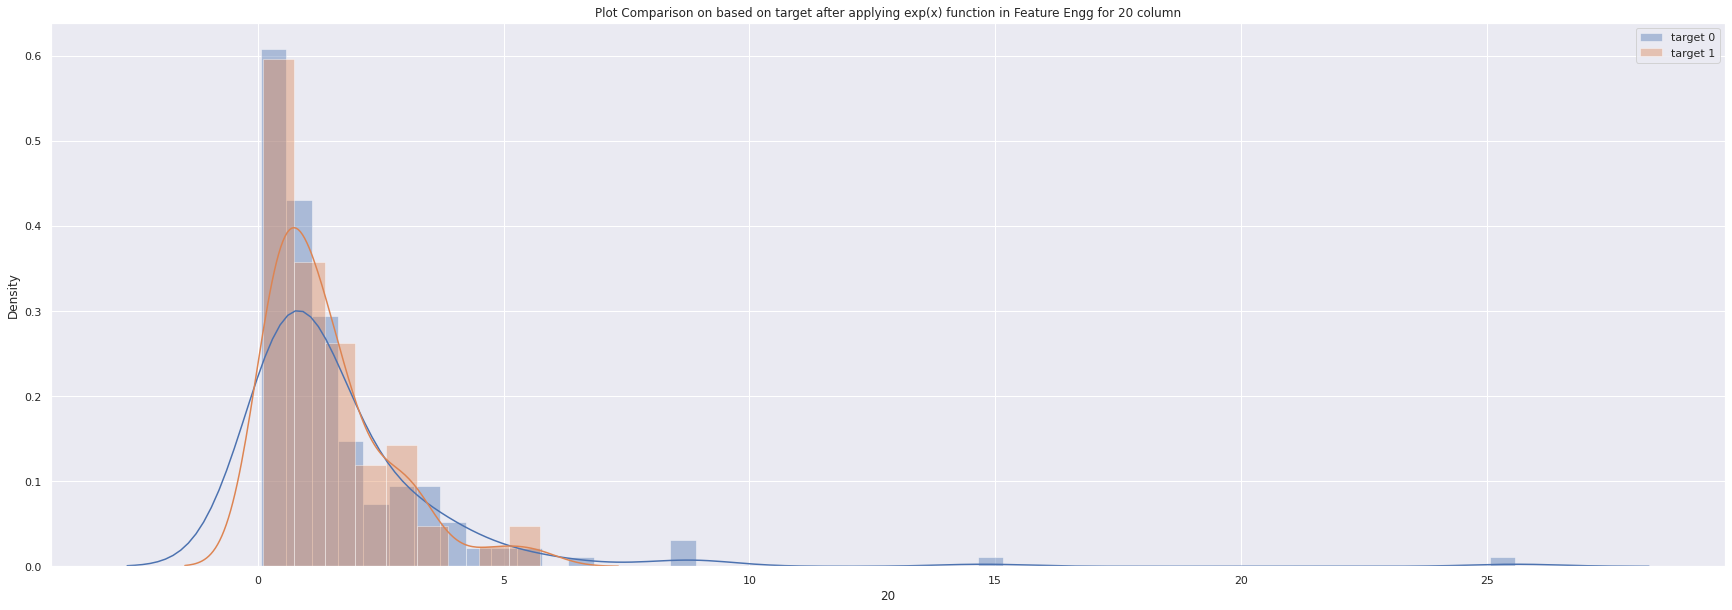

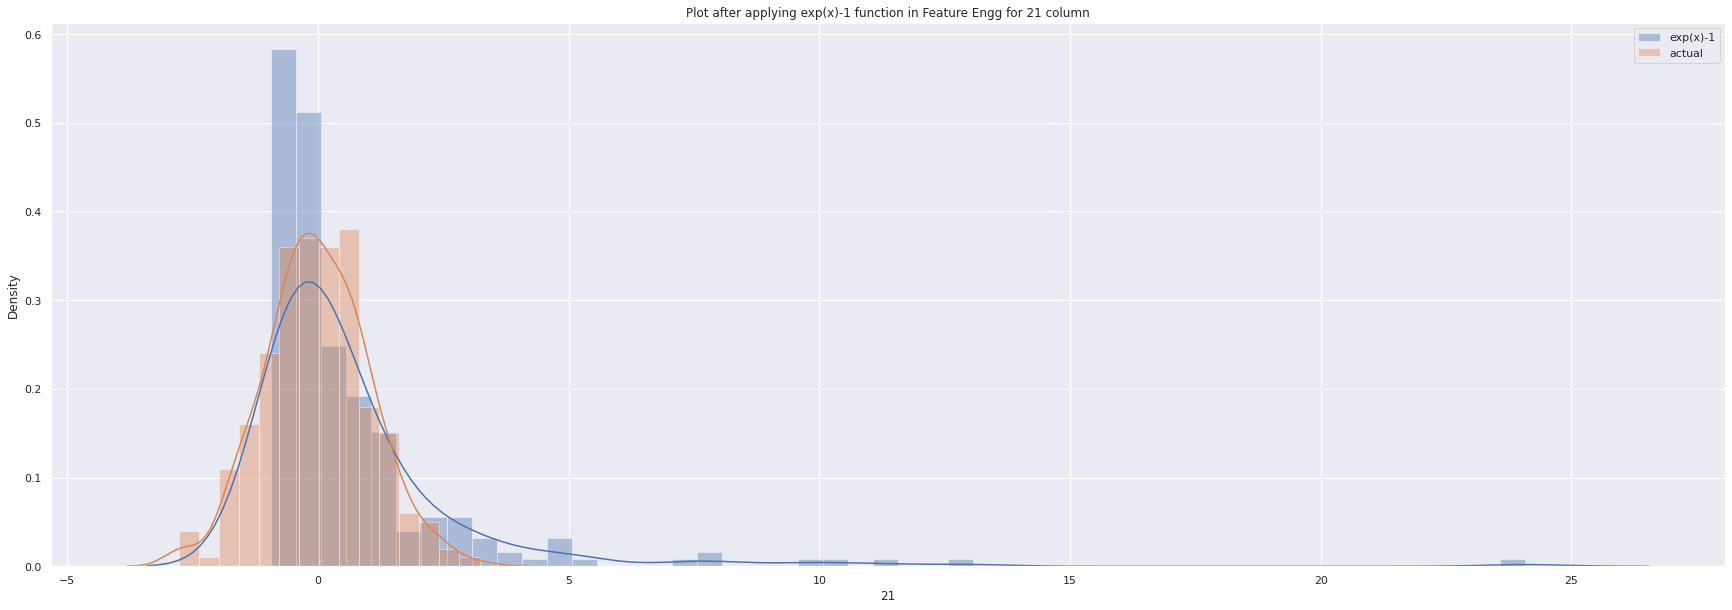

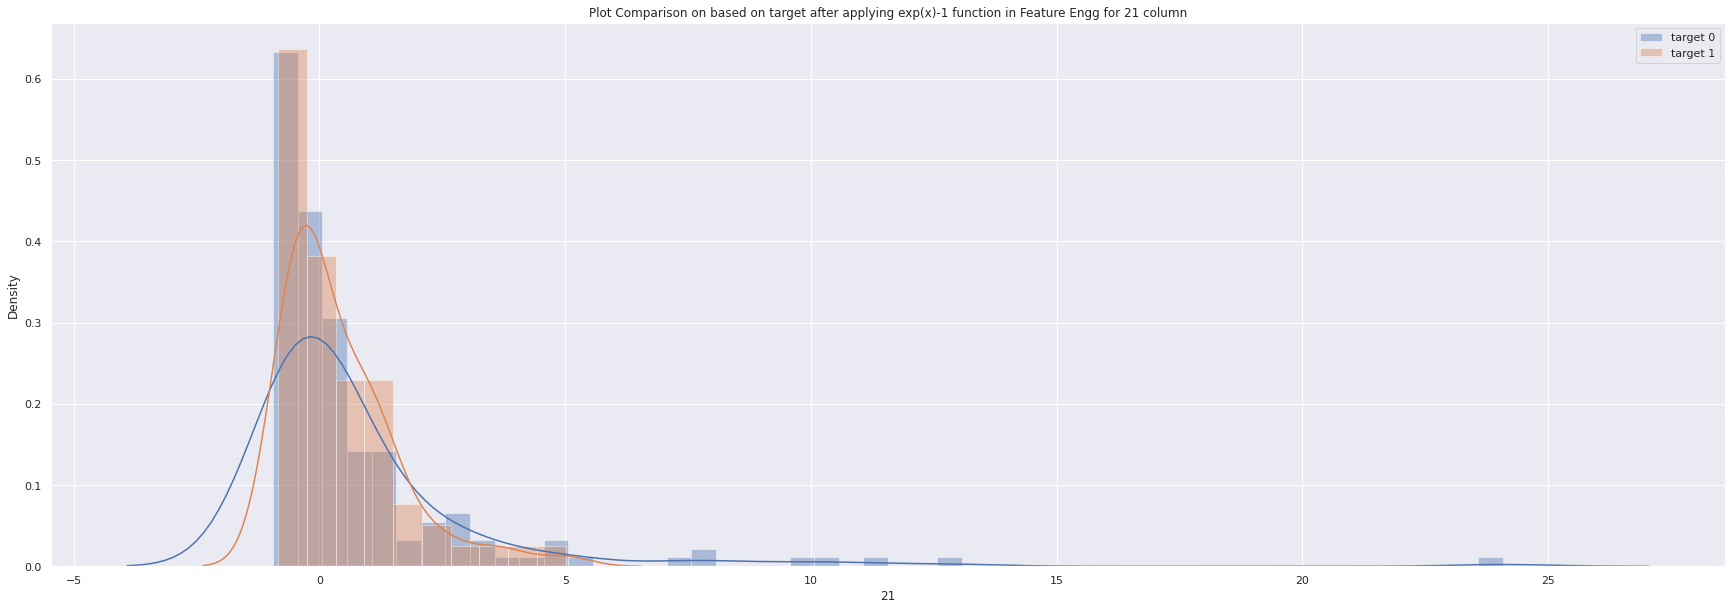

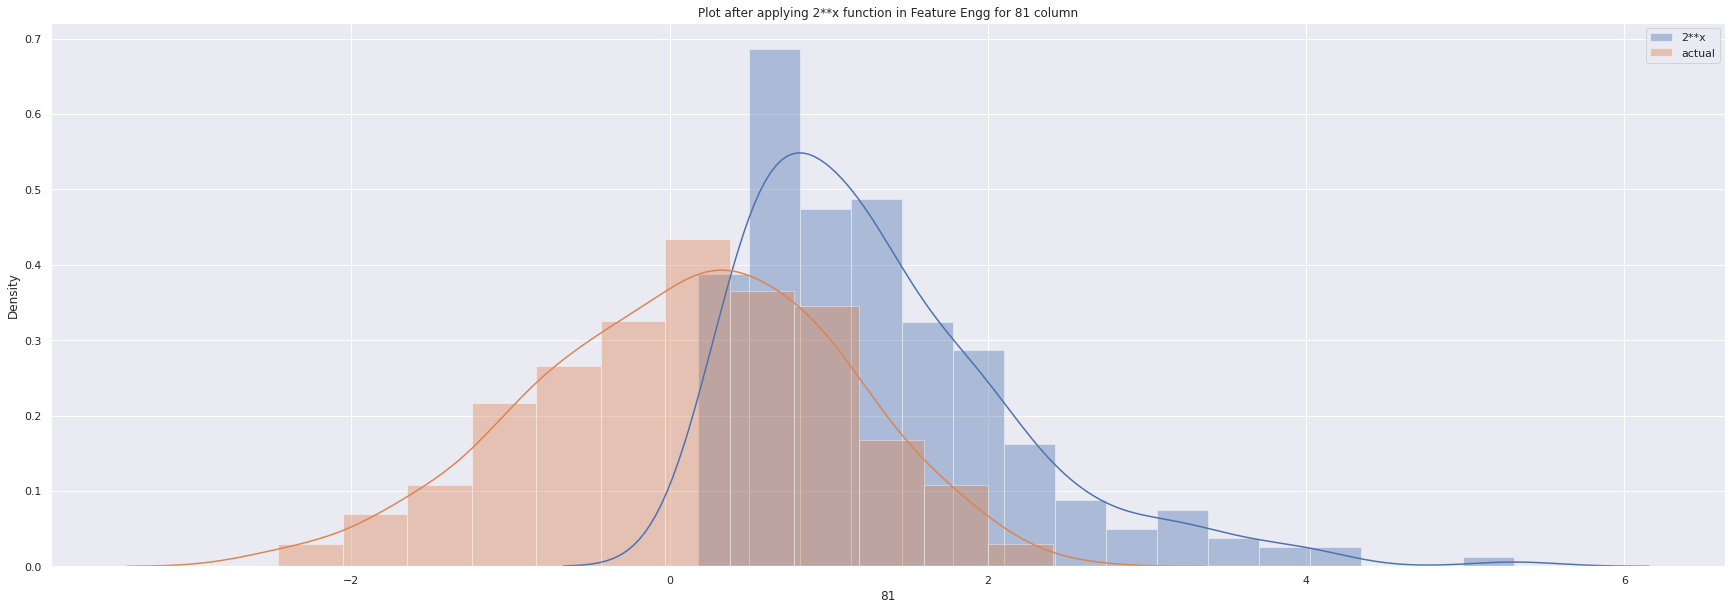

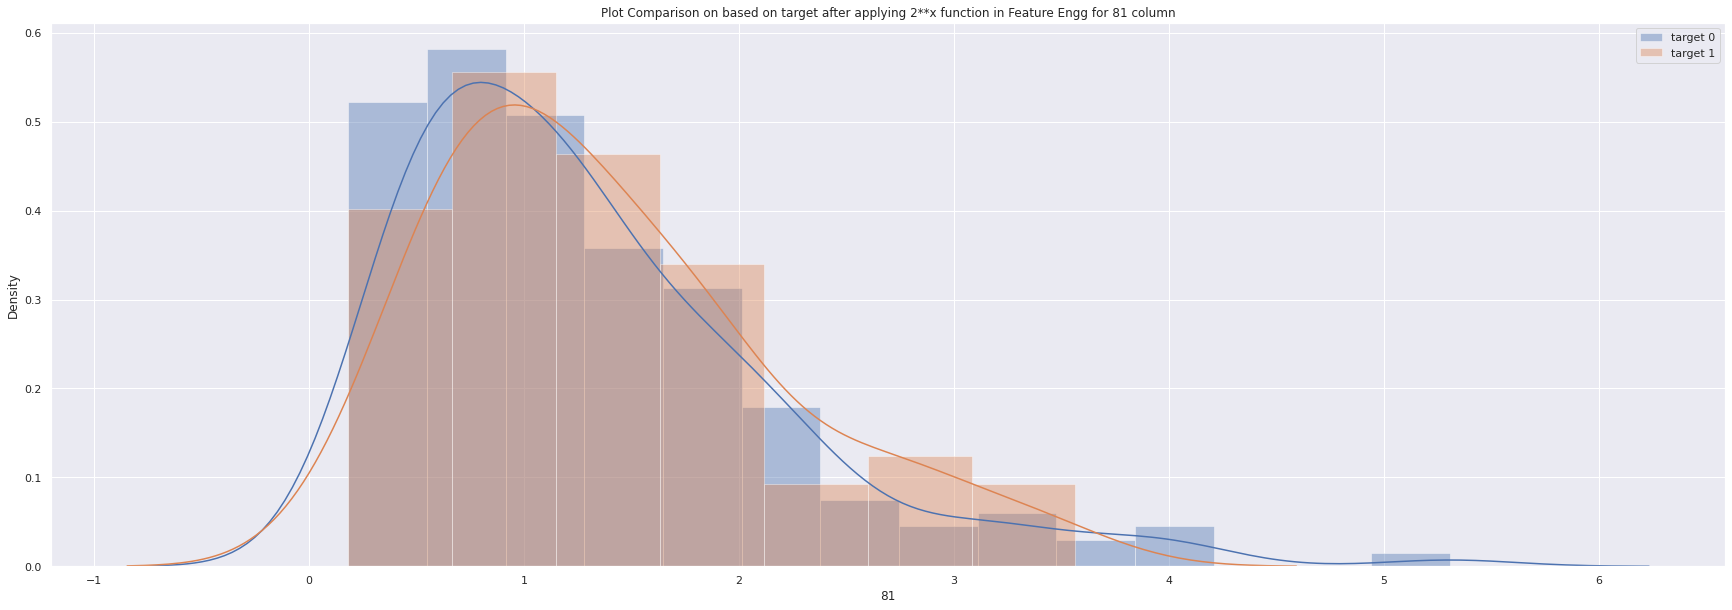

In [ ]:
feature_function('exp(x)',exp_data)
feature_function('exp(x)-1',expm1_data)
feature_function('2**x',exp2_data)

In [ ]:
train_data['mean_exp'] = np.mean(exp_data,axis=1)
train_data['mean_expm1'] = np.mean(expm1_data,axis=1)
train_data['mean_exp2'] = np. mean(exp2_data,axis=1)

In [ ]:
train_data.head()

id  target      0      1  ...  mean_tanh  mean_exp  mean_expm1  mean_exp2
0   0     1.0 -1.067 -1.114  ...   0.033133  1.803053    0.803053   1.332033
1   1     0.0 -0.831  0.271  ...   0.020731  1.789655    0.789655   1.333561
2   2     0.0  0.099  1.390  ...   0.005938  1.738833    0.738833   1.308808
3   3     1.0 -0.989 -0.916  ...  -0.047605  1.589949    0.589949   1.227480
4   4     0.0  0.811 -1.509  ...  -0.062958  1.522940    0.522940   1.204491

[5 rows x 313 columns]